# ScVelo: telencephalon

Focusing on more detailed analysis of transitions between radial glia and neurons in telencephalon datasets. Following upon a previous analysis where I tested parameter range.    

In [1]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
#import bbknn

scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo')
cr.settings.verbosity = 2

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

import warnings
warnings.filterwarnings('ignore')

scanpy==1.7.2 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2


### Load datasets

The available datasets composed of only telencephalon are 7 libraries prepared from fresh cells. Ommit fixed libraries.   

In [2]:
b1_tel = sc.read_loom("/local/Nina/10x_brains_trans/mapped_DR11_CR6/b1_tel/velocyto/b1_tel.loom")
b2_tel = sc.read_loom("/local/Nina/10x_brains_trans/mapped_DR11_CR6/b2_tel/velocyto/b2_tel.loom")
b3_tel = sc.read_loom("/local/Nina/10x_brains_trans/mapped_DR11_CR6/b3_tel/velocyto/b3_tel.loom")
b4_tel = sc.read_loom("/local/Nina/10x_brains_trans/mapped_DR11_CR6/b4_tel/velocyto/b4_tel.loom")
b5_tel = sc.read_loom("/local/Nina/10x_brains_trans/mapped_DR11_CR6/b5_tel/velocyto/b5_tel.loom")
b6_tel = sc.read_loom("/local/Nina/10x_brains_trans/mapped_DR11_CR6/b6_tel/velocyto/b6_tel.loom")
b7_tel = sc.read_loom("/local/Nina/10x_brains_trans/mapped_DR11_CR6/b7_tel/velocyto/b7_tel.loom")


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
b1_tel.var_names_make_unique()
b2_tel.var_names_make_unique()
b3_tel.var_names_make_unique()
b4_tel.var_names_make_unique()
b5_tel.var_names_make_unique()
b6_tel.var_names_make_unique()
b7_tel.var_names_make_unique()


#### Rename barcodes
For compatibility with my Seurat naming convention.  

In [4]:
# the clusters and X/Y values are from secondary analysis in CellRanger, no need to keep them
b1_tel.obs

Clusters         _X         _Y
CellID                                                
b1_tel:AAATTGACGCAGAGx         3  -5.415350  26.440210
b1_tel:AAGGTCACCTAGACx         4 -28.375284   6.532148
b1_tel:AACCAGTGAGTCACx         1   5.122446 -18.592194
b1_tel:ACAGCAACCTAAGCx         0  24.273336 -13.724024
b1_tel:AAGATGGAAAAGTGx         2   7.893138  10.901121
...                          ...        ...        ...
b1_tel:TTGTCATGGAGCTTx         5 -13.796535 -17.894167
b1_tel:TTTGACTGCTTACTx         0  28.436968  -7.193507
b1_tel:TTGATCTGCTTGAGx         2   8.032143  32.254566
b1_tel:TGTATGCTATTTCCx         4 -43.694466   6.266562
b1_tel:TTGACACTATCGTGx         0  33.148815 -15.254020

[1557 rows x 3 columns]

In [5]:
b1_tel_orig_barcode = b1_tel.obs.index.values

barcode_data_suffix = []
for barcode in b1_tel.obs.index.values:
    barcode_suffix = barcode.split(':')[1]
    barcode_suffix = barcode_suffix[:-1]
    barcode_suffix = 'B1.T_' + barcode_suffix + '-1'

    barcode_data_suffix.append(barcode_suffix)
    
barcode_data_suffix = np.array(barcode_data_suffix)
barcode_data_df = pd.DataFrame(barcode_data_suffix).set_index(0)
barcode_data_df = barcode_data_df.rename_axis(None)

b1_tel.obs = barcode_data_df
b1_tel.obs['orig_barcode'] = b1_tel_orig_barcode

In [6]:
b2_tel_orig_barcode = b2_tel.obs.index.values

barcode_data_suffix = []
for barcode in b2_tel.obs.index.values:
    barcode_suffix = barcode.split(':')[1]
    barcode_suffix = barcode_suffix[:-1]
    barcode_suffix = 'B2.T_' + barcode_suffix + '-1'

    barcode_data_suffix.append(barcode_suffix)
    
barcode_data_suffix = np.array(barcode_data_suffix)
barcode_data_df = pd.DataFrame(barcode_data_suffix).set_index(0)
barcode_data_df = barcode_data_df.rename_axis(None)

b2_tel.obs = barcode_data_df
b2_tel.obs['orig_barcode'] = b2_tel_orig_barcode

In [7]:
b3_tel_orig_barcode = b3_tel.obs.index.values

barcode_data_suffix = []
for barcode in b3_tel.obs.index.values:
    barcode_suffix = barcode.split(':')[1]
    barcode_suffix = barcode_suffix[:-1]
    barcode_suffix = 'B3.T_' + barcode_suffix + '-1'

    barcode_data_suffix.append(barcode_suffix)
    
barcode_data_suffix = np.array(barcode_data_suffix)
barcode_data_df = pd.DataFrame(barcode_data_suffix).set_index(0)
barcode_data_df = barcode_data_df.rename_axis(None)

b3_tel.obs = barcode_data_df
b3_tel.obs['orig_barcode'] = b3_tel_orig_barcode

In [8]:
b4_tel_orig_barcode = b4_tel.obs.index.values

barcode_data_suffix = []
for barcode in b4_tel.obs.index.values:
    barcode_suffix = barcode.split(':')[1]
    barcode_suffix = barcode_suffix[:-1]
    barcode_suffix = 'B4.T_' + barcode_suffix + '-1'

    barcode_data_suffix.append(barcode_suffix)
    
barcode_data_suffix = np.array(barcode_data_suffix)
barcode_data_df = pd.DataFrame(barcode_data_suffix).set_index(0)
barcode_data_df = barcode_data_df.rename_axis(None)

b4_tel.obs = barcode_data_df
b4_tel.obs['orig_barcode'] = b4_tel_orig_barcode

In [9]:
b5_tel_orig_barcode = b5_tel.obs.index.values

barcode_data_suffix = []
for barcode in b5_tel.obs.index.values:
    barcode_suffix = barcode.split(':')[1]
    barcode_suffix = barcode_suffix[:-1]
    barcode_suffix = 'B5.T_' + barcode_suffix + '-1'

    barcode_data_suffix.append(barcode_suffix)
    
barcode_data_suffix = np.array(barcode_data_suffix)
barcode_data_df = pd.DataFrame(barcode_data_suffix).set_index(0)
barcode_data_df = barcode_data_df.rename_axis(None)

b5_tel.obs = barcode_data_df
b5_tel.obs['orig_barcode'] = b5_tel_orig_barcode

In [10]:
b6_tel_orig_barcode = b6_tel.obs.index.values

barcode_data_suffix = []
for barcode in b6_tel.obs.index.values:
    barcode_suffix = barcode.split(':')[1]
    barcode_suffix = barcode_suffix[:-1]
    barcode_suffix = 'B6.T_' + barcode_suffix + '-1'

    barcode_data_suffix.append(barcode_suffix)
    
barcode_data_suffix = np.array(barcode_data_suffix)
barcode_data_df = pd.DataFrame(barcode_data_suffix).set_index(0)
barcode_data_df = barcode_data_df.rename_axis(None)

b6_tel.obs = barcode_data_df
b6_tel.obs['orig_barcode'] = b6_tel_orig_barcode

In [11]:
b7_tel_orig_barcode = b7_tel.obs.index.values

barcode_data_suffix = []
for barcode in b7_tel.obs.index.values:
    barcode_suffix = barcode.split(':')[1]
    barcode_suffix = barcode_suffix[:-1]
    barcode_suffix = 'B7.T_' + barcode_suffix + '-1'

    barcode_data_suffix.append(barcode_suffix)
    
barcode_data_suffix = np.array(barcode_data_suffix)
barcode_data_df = pd.DataFrame(barcode_data_suffix).set_index(0)
barcode_data_df = barcode_data_df.rename_axis(None)

b7_tel.obs = barcode_data_df
b7_tel.obs['orig_barcode'] = b7_tel_orig_barcode

In [12]:
b1_tel.obs

orig_barcode
B1.T_AAATTGACGCAGAG-1  b1_tel:AAATTGACGCAGAGx
B1.T_AAGGTCACCTAGAC-1  b1_tel:AAGGTCACCTAGACx
B1.T_AACCAGTGAGTCAC-1  b1_tel:AACCAGTGAGTCACx
B1.T_ACAGCAACCTAAGC-1  b1_tel:ACAGCAACCTAAGCx
B1.T_AAGATGGAAAAGTG-1  b1_tel:AAGATGGAAAAGTGx
...                                       ...
B1.T_TTGTCATGGAGCTT-1  b1_tel:TTGTCATGGAGCTTx
B1.T_TTTGACTGCTTACT-1  b1_tel:TTTGACTGCTTACTx
B1.T_TTGATCTGCTTGAG-1  b1_tel:TTGATCTGCTTGAGx
B1.T_TGTATGCTATTTCC-1  b1_tel:TGTATGCTATTTCCx
B1.T_TTGACACTATCGTG-1  b1_tel:TTGACACTATCGTGx

[1557 rows x 1 columns]

#### Combine datasets

7 libraries in total, all prepared from fresh cells (as it was seen that fixation leads to strange artefacts for the trajectories, I will ommit fixed samples from scVelo analysis).

In [13]:
tel = b1_tel.concatenate(b2_tel, b3_tel, b4_tel, b5_tel, b6_tel, b7_tel, index_unique=None)

In [14]:
tel.obs

orig_barcode batch
B1.T_AAATTGACGCAGAG-1      b1_tel:AAATTGACGCAGAGx     0
B1.T_AAGGTCACCTAGAC-1      b1_tel:AAGGTCACCTAGACx     0
B1.T_AACCAGTGAGTCAC-1      b1_tel:AACCAGTGAGTCACx     0
B1.T_ACAGCAACCTAAGC-1      b1_tel:ACAGCAACCTAAGCx     0
B1.T_AAGATGGAAAAGTG-1      b1_tel:AAGATGGAAAAGTGx     0
...                                           ...   ...
B7.T_TTTGGTTGTTGCGTTA-1  b7_tel:TTTGGTTGTTGCGTTAx     6
B7.T_TTTGCGCGTCAGATAA-1  b7_tel:TTTGCGCGTCAGATAAx     6
B7.T_TTTCCTCAGTCAAGCG-1  b7_tel:TTTCCTCAGTCAAGCGx     6
B7.T_TTGCGTCTCAGCTTAG-1  b7_tel:TTGCGTCTCAGCTTAGx     6
B7.T_TTTATGCCAGGGCATA-1  b7_tel:TTTATGCCAGGGCATAx     6

[15323 rows x 2 columns]

In [15]:
tel.rename_categories('batch', ['b1_tel', 'b2_tel', 'b3_tel', 'b4_tel', 'b5_tel', 'b6_tel', 'b7_tel'])
tel.obs["batch"]

B1.T_AAATTGACGCAGAG-1      b1_tel
B1.T_AAGGTCACCTAGAC-1      b1_tel
B1.T_AACCAGTGAGTCAC-1      b1_tel
B1.T_ACAGCAACCTAAGC-1      b1_tel
B1.T_AAGATGGAAAAGTG-1      b1_tel
                            ...  
B7.T_TTTGGTTGTTGCGTTA-1    b7_tel
B7.T_TTTGCGCGTCAGATAA-1    b7_tel
B7.T_TTTCCTCAGTCAAGCG-1    b7_tel
B7.T_TTGCGTCTCAGCTTAG-1    b7_tel
B7.T_TTTATGCCAGGGCATA-1    b7_tel
Name: batch, Length: 15323, dtype: category
Categories (7, object): ['b1_tel', 'b2_tel', 'b3_tel', 'b4_tel', 'b5_tel', 'b6_tel', 'b7_tel']

In [16]:
del b1_tel, b2_tel, b3_tel, b4_tel, b5_tel, b6_tel, b7_tel

### Import and combine annotation

This is the annotation for cells that pass filtering criteria in Seurat as well as doublet removal. Therefore by selecting only for barcodes present in the annotated dataset, I can skip the usual filtering steps.  
 

In [17]:
annotation = pd.read_csv("/local/Nina/jupyterlab/brains_trans/ann_detailed.csv", index_col= 0)
annotation

Barcode Orig_ident Brain_reg_lib  \
B1.T_AAAGAGACGGATTC-1        B1.T_AAAGAGACGGATTC-1     b1_tel           tel   
B1.T_AAAGAGACTAGACC-1        B1.T_AAAGAGACTAGACC-1     b1_tel           tel   
B1.T_AAAGAGACTCTACT-1        B1.T_AAAGAGACTCTACT-1     b1_tel           tel   
B1.T_AAAGGCCTAGATCC-1        B1.T_AAAGGCCTAGATCC-1     b1_tel           tel   
B1.T_AAATACTGGAATAG-1        B1.T_AAATACTGGAATAG-1     b1_tel           tel   
...                                            ...        ...           ...   
B19.M_TTTGGTTAGGTTGAGC-1  B19.M_TTTGGTTAGGTTGAGC-1   b19_tdmr         whole   
B20.M_ATGGTTGTCGCTACAA-1  B20.M_ATGGTTGTCGCTACAA-1   b20_gfap         whole   
B20.M_GCATCTCCATAATCCG-1  B20.M_GCATCTCCATAATCCG-1   b20_gfap         whole   
B20.M_GGTTCTCCAAAGCTAA-1  B20.M_GGTTCTCCAAAGCTAA-1   b20_gfap         whole   
B20.M_TACAACGAGACATATG-1  B20.M_TACAACGAGACATATG-1   b20_gfap         whole   

                         Fixation    Celltype_major  \
B1.T_AAAGAGACGGATTC-1       fresh           Neurons   
B1.T_AAAGAGACTAGACC-1       fresh           Neurons   
B1.T_AAAGAGACTCTACT-1       fresh           Neurons   
B1.T_AAAGGCCTAGATCC-1       fresh           Neurons   
B1.T_AAATACTGGAATAG-1       fresh           Neurons   
...                           ...               ...   
B19.M_TTTGGTTAGGTTGAGC-1    fresh   Ependymal cells   
B20.M_ATGGTTGTCGCTACAA-1    fresh  Epithelial cells   
B20.M_GCATCTCCATAATCCG-1    fresh  Epithelial cells   
B20.M_GGTTCTCCAAAGCTAA-1    fresh  Epithelial cells   
B20.M_TACAACGAGACATATG-1    fresh  Epithelial cells   

                                       Celltype_detailed  \
B1.T_AAAGAGACGGATTC-1        Neurons glutamatargic (tel)   
B1.T_AAAGAGACTAGACC-1     Neurons gabaergic penkb+ (tel)   
B1.T_AAAGAGACTCTACT-1        Neurons glutamatargic (tel)   
B1.T_AAAGGCCTAGATCC-1     Neurons gabaergic pax6b+ (tel)   
B1.T_AAATACTGGAATAG-1                      Granule cells   
...                                                  ...   
B19.M_TTTGGTTAGGTTGAGC-1                 Ependymal cells   
B20.M_ATGGTTGTCGCTACAA-1                Epithelial cells   
B20.M_GCATCTCCATAATCCG-1                Epithelial cells   
B20.M_GGTTCTCCAAAGCTAA-1                Epithelial cells   
B20.M_TACAACGAGACATATG-1                Epithelial cells   

                         Celltype_detailed_short  Keep_in_final Region_simple  \
B1.T_AAAGAGACGGATTC-1             Neu glut (tel)           True      Regional   
B1.T_AAAGAGACTAGACC-1      Neu gaba penkb+ (tel)           True      Regional   
B1.T_AAAGAGACTCTACT-1             Neu glut (tel)           True      Regional   
B1.T_AAAGGCCTAGATCC-1      Neu gaba pax6b+ (tel)           True      Regional   
B1.T_AAATACTGGAATAG-1                 Gran cells           True        Global   
...                                          ...            ...           ...   
B19.M_TTTGGTTAGGTTGAGC-1                   Epend           True       Unknown   
B20.M_ATGGTTGTCGCTACAA-1                   Epith           True       Unknown   
B20.M_GCATCTCCATAATCCG-1                   Epith           True       Unknown   
B20.M_GGTTCTCCAAAGCTAA-1                   Epith           True       Unknown   
B20.M_TACAACGAGACATATG-1                   Epith           True       Unknown   

                         Region_detailed  Region_score_max  \
B1.T_AAAGAGACGGATTC-1                Tel              0.91   
B1.T_AAAGAGACTAGACC-1                Tel              0.92   
B1.T_AAAGAGACTCTACT-1                Tel              0.91   
B1.T_AAAGGCCTAGATCC-1                Tel              0.77   
B1.T_AAATACTGGAATAG-1              Multi              0.44   
...                                  ...               ...   
B19.M_TTTGGTTAGGTTGAGC-1         Unknown              0.00   
B20.M_ATGGTTGTCGCTACAA-1         Unknown              0.00   
B20.M_GCATCTCCATAATCCG-1         Unknown              0.00   
B20.M_GGTTCTCCAAAGCTAA-1         Unknown              0.00   
B20.M_TACAACGAGACATATG-1         Unknown              0.0

#### Subset annotation and AnnData for matching cells

In [18]:
barcodes_in_data = list(tel.obs.index.values)
print(len(barcodes_in_data))

15323


In [19]:
#subset for barcodes in annotation that overlap with the tel dataset
annotation_tel_indata = annotation[annotation.Barcode.isin(barcodes_in_data)]

In [20]:
len(annotation_tel_indata)

11339

In [21]:
annotation_tel_indata = annotation_tel_indata.set_index('Barcode')
annotation_tel_indata

Orig_ident Brain_reg_lib Fixation    Celltype_major  \
Barcode                                                                       
B1.T_AAAGAGACGGATTC-1       b1_tel           tel    fresh           Neurons   
B1.T_AAAGAGACTAGACC-1       b1_tel           tel    fresh           Neurons   
B1.T_AAAGAGACTCTACT-1       b1_tel           tel    fresh           Neurons   
B1.T_AAAGGCCTAGATCC-1       b1_tel           tel    fresh           Neurons   
B1.T_AAATACTGGAATAG-1       b1_tel           tel    fresh           Neurons   
...                            ...           ...      ...               ...   
B7.T_TTCTCAACACGAAGCA-1     b7_tel           tel    fresh   Ependymal cells   
B7.T_TTGCGTCTCAACACTG-1     b7_tel           tel    fresh  Epithelial cells   
B7.T_TTGTAGGTCTTGCATT-1     b7_tel           tel    fresh  Epithelial cells   
B7.T_TTTACTGGTTTCGCTC-1     b7_tel           tel    fresh  Epithelial cells   
B7.T_TTTATGCCAGGGCATA-1     b7_tel           tel    fresh   Ependymal cells   

                                      Celltype_detailed  \
Barcode                                                   
B1.T_AAAGAGACGGATTC-1       Neurons glutamatargic (tel)   
B1.T_AAAGAGACTAGACC-1    Neurons gabaergic penkb+ (tel)   
B1.T_AAAGAGACTCTACT-1       Neurons glutamatargic (tel)   
B1.T_AAAGGCCTAGATCC-1    Neurons gabaergic pax6b+ (tel)   
B1.T_AAATACTGGAATAG-1                     Granule cells   
...                                                 ...   
B7.T_TTCTCAACACGAAGCA-1                 Ependymal cells   
B7.T_TTGCGTCTCAACACTG-1                Epithelial cells   
B7.T_TTGTAGGTCTTGCATT-1                Epithelial cells   
B7.T_TTTACTGGTTTCGCTC-1                Epithelial cells   
B7.T_TTTATGCCAGGGCATA-1                 Ependymal cells   

                        Celltype_detailed_short  Keep_in_final Region_simple  \
Barcode                                                                        
B1.T_AAAGAGACGGATTC-1            Neu glut (tel)           True      Regional   
B1.T_AAAGAGACTAGACC-1     Neu gaba penkb+ (tel)           True      Regional   
B1.T_AAAGAGACTCTACT-1            Neu glut (tel)           True      Regional   
B1.T_AAAGGCCTAGATCC-1     Neu gaba pax6b+ (tel)           True      Regional   
B1.T_AAATACTGGAATAG-1                Gran cells           True        Global   
...                                         ...            ...           ...   
B7.T_TTCTCAACACGAAGCA-1                   Epend           True       Unknown   
B7.T_TTGCGTCTCAACACTG-1                   Epith           True       Unknown   
B7.T_TTGTAGGTCTTGCATT-1                   Epith           True       Unknown   
B7.T_TTTACTGGTTTCGCTC-1                   Epith           True       Unknown   
B7.T_TTTATGCCAGGGCATA-1                   Epend           True       Unknown   

                        Region_detailed  Region_score_max  \
Barcode                                                     
B1.T_AAAGAGACGGATTC-1               Tel              0.91   
B1.T_AAAGAGACTAGACC-1               Tel              0.92   
B1.T_AAAGAGACTCTACT-1               Tel              0.91   
B1.T_AAAGGCCTAGATCC-1               Tel              0.77   
B1.T_AAATACTGGAATAG-1             Multi              0.44   
...                                 ...               ...   
B7.T_TTCTCAACACGAAGCA-1         Unknown              0.00   
B7.T_TTGCGTCTCAACACTG-1         Unknown              0.00   
B7.T_TTGTAGGTCTTGCATT-1         Unknown              0.00   
B7.T_TTTACTGGTTTCGCTC-1         Unknown              0.00   
B7.T_TTTATGCCAGGGCATA-1         Unknown              0.00   

                        Region_score_max_name  Region_score_tel  \
Barcode                                                           
B1.T_AAAGAGACGGATTC-1                tel_0.91              0.91   
B1.T_AAAGAGACTAGACC-1                tel_0.92              0.92   
B1.T_AAAGAGACTCTACT-1                tel_0.91              0.91   
B1.T_AAAGGCCTAGATCC-1                tel_0.77             

In [22]:
# also subset for only those cells in the dataset that do have available annotation
# alternatively if I want to keep more I need to include option to add Unknown for obs columns
barcodes_in_annotation = list(annotation_tel_indata.index.values)
print(len(barcodes_in_annotation))

11339


Something that consistently happens with datasets imported from loom files mapped with velocyto, is that they have more cell barcodes than the ones in the final annotation taht I obtained from processing cells in Seurat after mapping with CellRanger. This is because of both original difference in tresholds when mapping with velocyto vs CellRanger (velocyto appears to be less stringent and allows more valid cell barcodes), and the dowsntream filtering of cells based on gene and UMI counts. Therefore I now subset the complete dataset to only those cells present in the annotation (ie CellRanger/Seurat pipeline), since I trust them to be of higher quality and biologically valid.  

In [23]:
tel_sub = tel[barcodes_in_annotation,]

In [24]:
tel_sub

View of AnnData object with n_obs × n_vars = 11339 × 32520
    obs: 'orig_barcode', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

#### Add metadata columns to AnnData (obs)

Step 1: initialize empty lists for each column I want to add

In [25]:
fixation = []
celltype_major = []
celltype_detailed = []
celltype_detailed_short = []
keep_in_final = []
region_simple = []
region_detailed = []
region_score_max = []
region_score_max_name = []
region_score_tel = []
region_score_dien = []
region_score_mes = []
region_score_rhom = []

Step 2: for each barcode in the dataset write correct value to the appropriate list (in case the dataset contains cell not in the annotation write "Other") - this puts the entries in the list in the same order as they are in the AnnData object

In [26]:
for barcode_data in tel_sub.obs.index.values:
    #print(i)
    #barcode = i.obs.index.values[0]
    if barcode_data in barcodes_in_annotation:
        fixation.append(annotation_tel_indata.Fixation[barcode_data])
        celltype_major.append(annotation_tel_indata.Celltype_major[barcode_data])
        celltype_detailed.append(annotation_tel_indata.Celltype_detailed[barcode_data])
        celltype_detailed_short.append(annotation_tel_indata.Celltype_detailed_short[barcode_data])
        #need to convert to string, AnnData cannot be saved to disk with bool in metadata for some reason
        keep_in_final.append(str(annotation_tel_indata.Keep_in_final[barcode_data]))
        region_simple.append(annotation_tel_indata.Region_simple[barcode_data])
        region_detailed.append(annotation_tel_indata.Region_detailed[barcode_data])
        region_score_max.append(annotation_tel_indata.Region_score_max[barcode_data])
        region_score_max_name.append(annotation_tel_indata.Region_score_max_name[barcode_data])
        region_score_tel.append(annotation_tel_indata.Region_score_tel[barcode_data])
        region_score_dien.append(annotation_tel_indata.Region_score_dien[barcode_data])
        region_score_mes.append(annotation_tel_indata.Region_score_mes[barcode_data])
        region_score_rhom.append(annotation_tel_indata.Region_score_rhom[barcode_data])

    else:
        fixation.append('Other')
        celltype_major.append('Other')
        celltype_detailed.append('Other')
        celltype_detailed_short.append('Other')
        keep_in_final.append('Other')
        region_simple.append('Other')
        region_detailed.append('Other')
        region_score_max.append('Other')
        region_score_max_name.append('Other')
        region_score_tel.append('Other')
        region_score_dien.append('Other')
        region_score_mes.append('Other')
        region_score_rhom.append('Other')

In [27]:
len(keep_in_final)

11339

Step 3: add list to AnnData as obs, with conversion to categorial values for the character entries (better for efficiency and plotting)

In [28]:
tel_sub.obs['fixation'] = pd.Categorical(fixation)
tel_sub.obs['celltype_major'] = pd.Categorical(celltype_major)
tel_sub.obs['celltype_detailed'] = pd.Categorical(celltype_detailed)
tel_sub.obs['celltype_detailed_short'] = pd.Categorical(celltype_detailed_short)
tel_sub.obs['keep_in_final'] = pd.Categorical(keep_in_final)
tel_sub.obs['region_simple'] = pd.Categorical(region_simple)
tel_sub.obs['region_detailed'] = pd.Categorical(region_detailed)
tel_sub.obs['region_score_max'] = region_score_max
tel_sub.obs['region_score_max_name'] = pd.Categorical(region_score_max_name)
tel_sub.obs['region_score_tel'] = region_score_tel
tel_sub.obs['region_score_dien'] = region_score_dien
tel_sub.obs['region_score_mes'] = region_score_mes
tel_sub.obs['region_score_rhom'] = region_score_rhom

Trying to set attribute `.obs` of view, copying.


In [29]:
tel_sub.obs

orig_barcode   batch fixation  \
B1.T_AAAGAGACGGATTC-1      b1_tel:AAAGAGACGGATTCx  b1_tel    fresh   
B1.T_AAAGAGACTAGACC-1      b1_tel:AAAGAGACTAGACCx  b1_tel    fresh   
B1.T_AAAGAGACTCTACT-1      b1_tel:AAAGAGACTCTACTx  b1_tel    fresh   
B1.T_AAAGGCCTAGATCC-1      b1_tel:AAAGGCCTAGATCCx  b1_tel    fresh   
B1.T_AAATACTGGAATAG-1      b1_tel:AAATACTGGAATAGx  b1_tel    fresh   
...                                           ...     ...      ...   
B7.T_TTCTCAACACGAAGCA-1  b7_tel:TTCTCAACACGAAGCAx  b7_tel    fresh   
B7.T_TTGCGTCTCAACACTG-1  b7_tel:TTGCGTCTCAACACTGx  b7_tel    fresh   
B7.T_TTGTAGGTCTTGCATT-1  b7_tel:TTGTAGGTCTTGCATTx  b7_tel    fresh   
B7.T_TTTACTGGTTTCGCTC-1  b7_tel:TTTACTGGTTTCGCTCx  b7_tel    fresh   
B7.T_TTTATGCCAGGGCATA-1  b7_tel:TTTATGCCAGGGCATAx  b7_tel    fresh   

                           celltype_major               celltype_detailed  \
B1.T_AAAGAGACGGATTC-1             Neurons     Neurons glutamatargic (tel)   
B1.T_AAAGAGACTAGACC-1             Neurons  Neurons gabaergic penkb+ (tel)   
B1.T_AAAGAGACTCTACT-1             Neurons     Neurons glutamatargic (tel)   
B1.T_AAAGGCCTAGATCC-1             Neurons  Neurons gabaergic pax6b+ (tel)   
B1.T_AAATACTGGAATAG-1             Neurons                   Granule cells   
...                                   ...                             ...   
B7.T_TTCTCAACACGAAGCA-1   Ependymal cells                 Ependymal cells   
B7.T_TTGCGTCTCAACACTG-1  Epithelial cells                Epithelial cells   
B7.T_TTGTAGGTCTTGCATT-1  Epithelial cells                Epithelial cells   
B7.T_TTTACTGGTTTCGCTC-1  Epithelial cells                Epithelial cells   
B7.T_TTTATGCCAGGGCATA-1   Ependymal cells                 Ependymal cells   

                        celltype_detailed_short keep_in_final region_simple  \
B1.T_AAAGAGACGGATTC-1            Neu glut (tel)          True      Regional   
B1.T_AAAGAGACTAGACC-1     Neu gaba penkb+ (tel)          True      Regional   
B1.T_AAAGAGACTCTACT-1            Neu glut (tel)          True      Regional   
B1.T_AAAGGCCTAGATCC-1     Neu gaba pax6b+ (tel)          True      Regional   
B1.T_AAATACTGGAATAG-1                Gran cells          True        Global   
...                                         ...           ...           ...   
B7.T_TTCTCAACACGAAGCA-1                   Epend          True       Unknown   
B7.T_TTGCGTCTCAACACTG-1                   Epith          True       Unknown   
B7.T_TTGTAGGTCTTGCATT-1                   Epith          True       Unknown   
B7.T_TTTACTGGTTTCGCTC-1                   Epith          True       Unknown   
B7.T_TTTATGCCAGGGCATA-1                   Epend          True       Unknown   

                        region_detailed  region_score_max  \
B1.T_AAAGAGACGGATTC-1               Tel              0.91   
B1.T_AAAGAGACTAGACC-1               Tel              0.92   
B1.T_AAAGAGACTCTACT-1               Tel              0.91   
B1.T_AAAGGCCTAGATCC-1               Tel              0.77   
B1.T_AAATACTGGAATAG-1             Multi              0.44   
...                                 ...               ...   
B7.T_TTCTCAACACGAAGCA-1         Unknown              0.00   
B7.T_TTGCGTCTCAACACTG-1         Unknown              0.00   
B7.T_TTGTAGGTCTTGCATT-1         Unknown              0.00   
B7.T_TTTACTGGTTTCGCTC-1         Unknown              0.00   
B7.T_TTTATGCCAGGGCATA-1         Unknown              0.00   

                        region_score_max_name  region_score_tel  \
B1.T_AAAGAGACGGATTC-1                tel_0.91              0.91   
B1.T_AAAGAGACTAGACC-1                tel_0.92              0.92   
B1.T_AAAGAGACTCTACT-1                tel_0.91              0.91   
B1.T_AAAGGCCTAGATCC-1                tel_0.77              0.77   
B1.T_AAATACTGGAATAG-1                tel_0.44              0.44   
...                                       ...               ...   
B7.T_TTCTCAACACGAAGCA-1               Unknown              0.00   
B7.T_TTGCGTCTCAACACTG-1               Unknown        

#### Save copy to disk

Before proceeding with the analysis, I save a copy of the annotated & filtered dataset to disk so I can restart different types of analysis later from this point.

In [30]:
tel_sub.write(filename="tel_sub_prepr", compression='gzip')

... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


In [39]:
# read in
#tel_sub = sc.read_h5ad(filename="tel_sub_prepr")

## Full dataset

### Preprocessing for scVelo  

Perform standard preprocessing steps to get the UMAP embedding and clustering.  

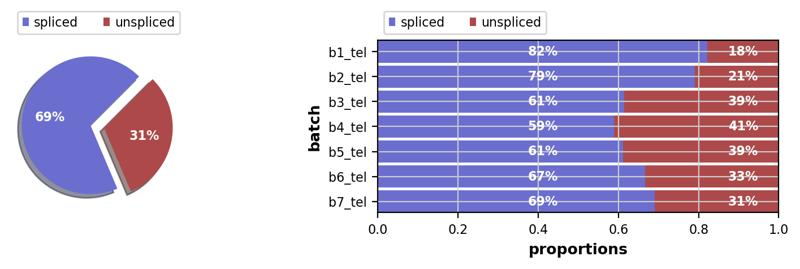

In [42]:
scv.pl.proportions(tel_sub, groupby='batch')

#### Normalize, find variable genes, run PCA

In [43]:
scv.pp.filter_and_normalize(tel_sub, log=True)

Normalized count data: X, spliced, unspliced.
Logarithmized X.


In [44]:
sc.pp.highly_variable_genes(tel_sub, n_top_genes=3000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


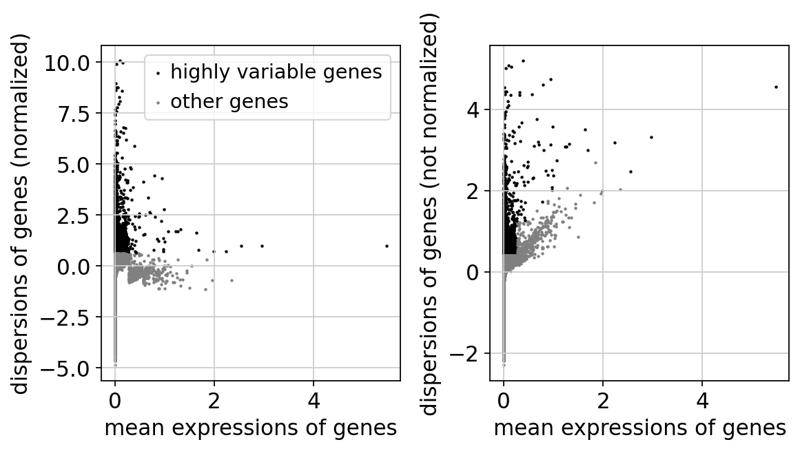

In [45]:
sc.pl.highly_variable_genes(tel_sub)

In [46]:
sc.tl.pca(tel_sub)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


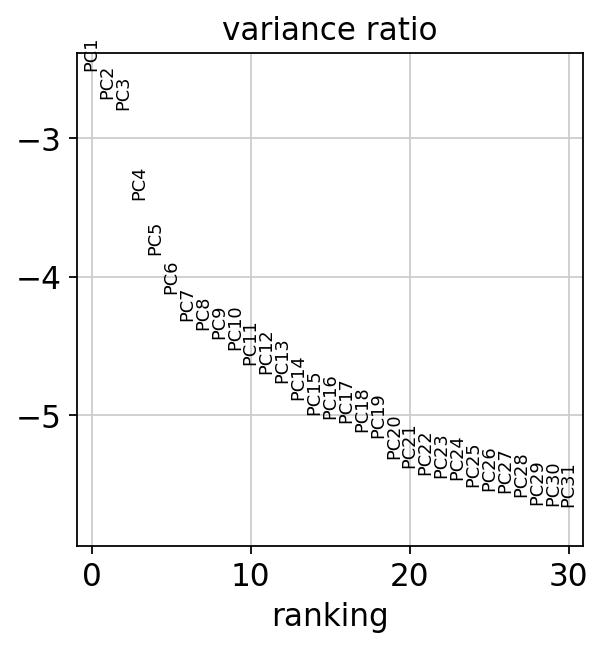

In [47]:
sc.pl.pca_variance_ratio(tel_sub, log=True)

#### Run bbknn
as alternative to neighbors() in workflow

https://scanpy.readthedocs.io/en/stable/external/scanpy.external.pp.bbknn.html

In [48]:
bbknn.bbknn(tel_sub, batch_key='batch')

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


In [49]:
# if n_pcs=None, n_neighbors=None arguments are used will use already existing embedding, in this case based on bbknn
scv.pp.moments(tel_sub, n_pcs=None, n_neighbors=None)

computing moments based on connectivities
    finished (0:00:10) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [50]:
sc.tl.umap(tel_sub)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


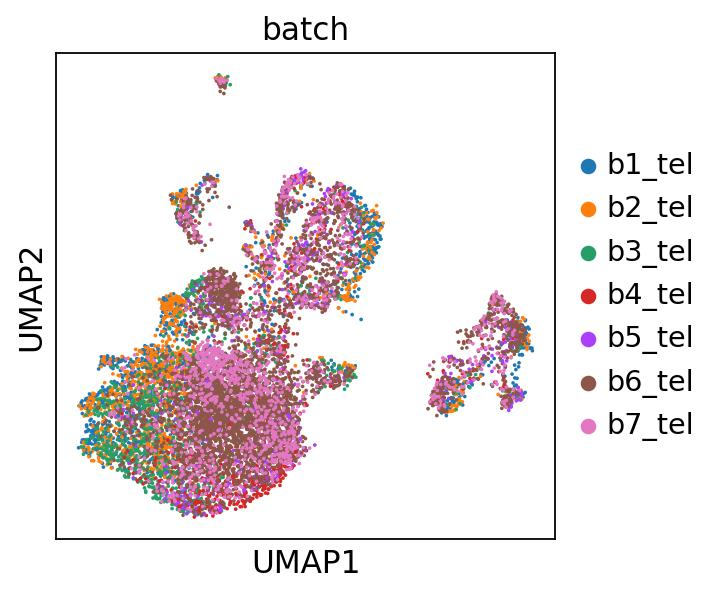

In [51]:
sc.pl.umap(tel_sub, color=['batch']) #with bbknn function

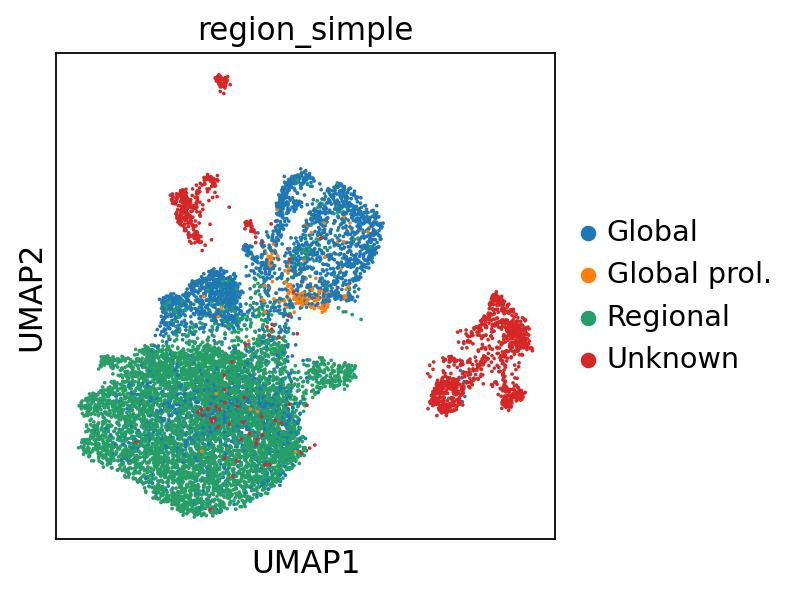

In [52]:
sc.pl.umap(tel_sub, color=['region_simple'])

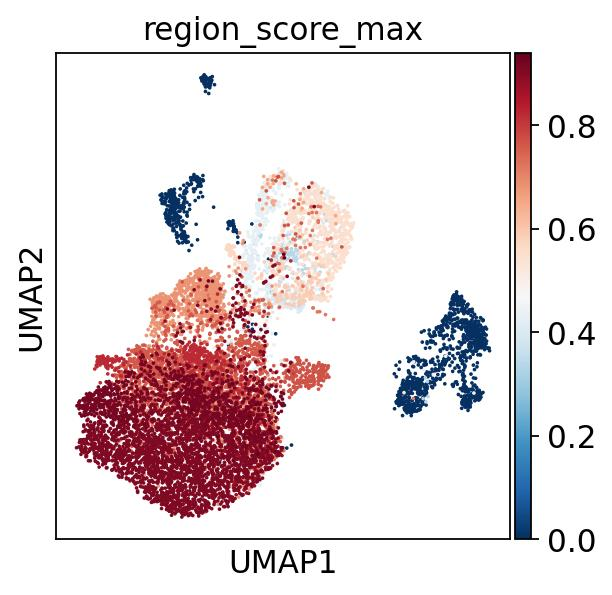

In [54]:
sc.pl.umap(tel_sub, color=['region_score_max'])

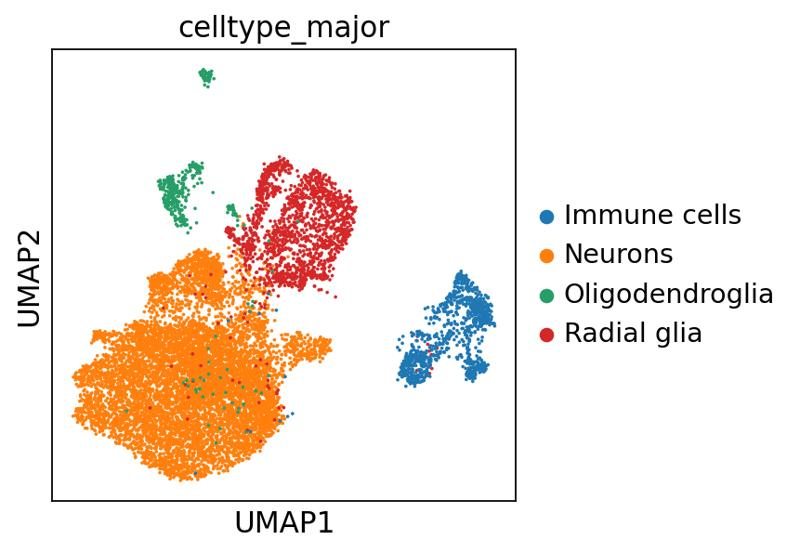

In [55]:
sc.pl.umap(tel_sub, color=['celltype_major'])

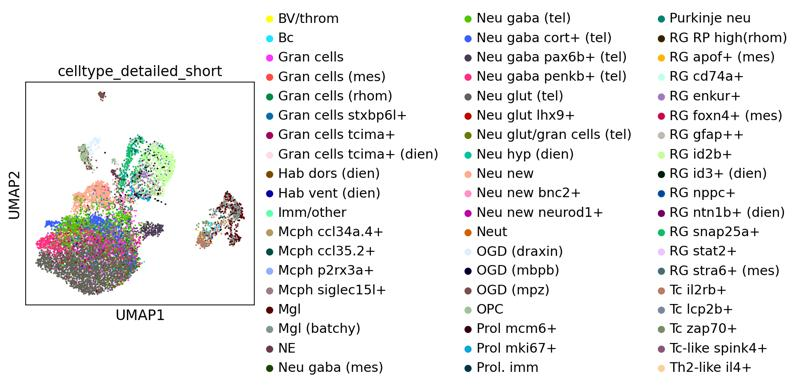

In [56]:
sc.pl.umap(tel_sub, color='celltype_detailed_short')

In [57]:
# this is the equivalent of R's table function!!
tel_sub.obs["celltype_major"].value_counts()

Neurons            8057
Radial glia        1556
Immune cells        934
Oligodendroglia     417
Name: celltype_major, dtype: int64

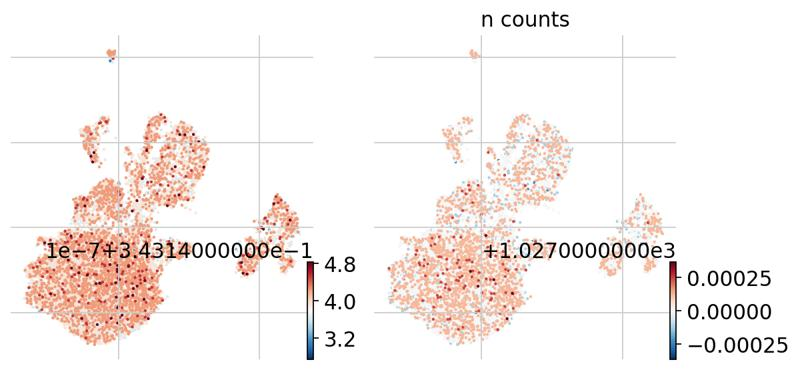

In [58]:
counts_s = scv.utils.sum_var(tel_sub.layers['spliced'])
counts_u = scv.utils.sum_var(tel_sub.layers['unspliced'])
fractions_u = counts_u / (counts_s + counts_u)
scv.pl.scatter(tel_sub, color=[fractions_u, 'n_counts'])

#### Leiden clustering 

In [59]:
sc.tl.leiden(tel_sub, resolution=1.5)

running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


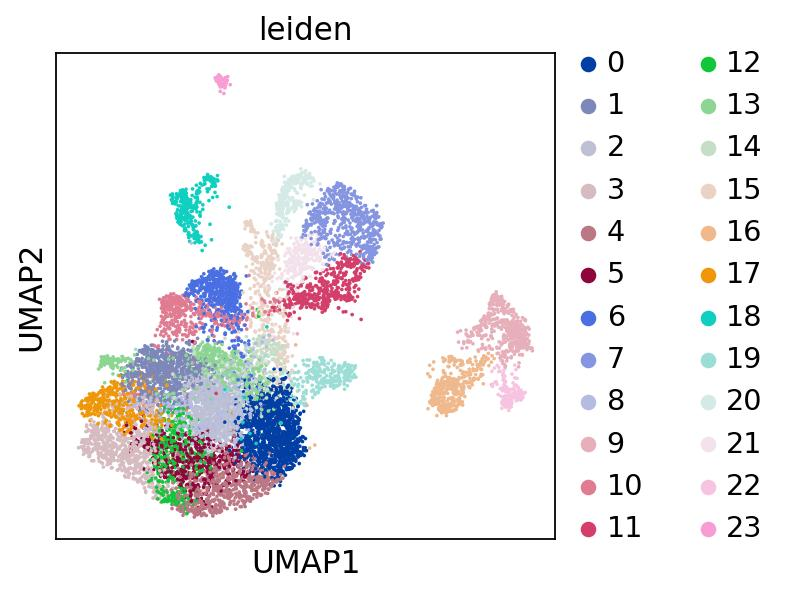

In [60]:
sc.pl.umap(tel_sub, color=['leiden'])

#### Cell cycle score

In [61]:
G2M_phase_genes = pd.read_csv("/local/users/nfresma/zebrafish_G2Mphase_genes.csv")
S_phase_genes = pd.read_csv("/local/users/nfresma/zebrafish_Sphase_genes.csv")

In [62]:
cell_cycle_genes = (G2M_phase_genes['x'].append(S_phase_genes['x']))

In [63]:
sc.tl.score_genes(tel_sub, cell_cycle_genes, score_name="cell_cycle_score")

computing score 'cell_cycle_score'
    finished: added
    'cell_cycle_score', score of gene set (adata.obs).
    899 total control genes are used. (0:00:00)


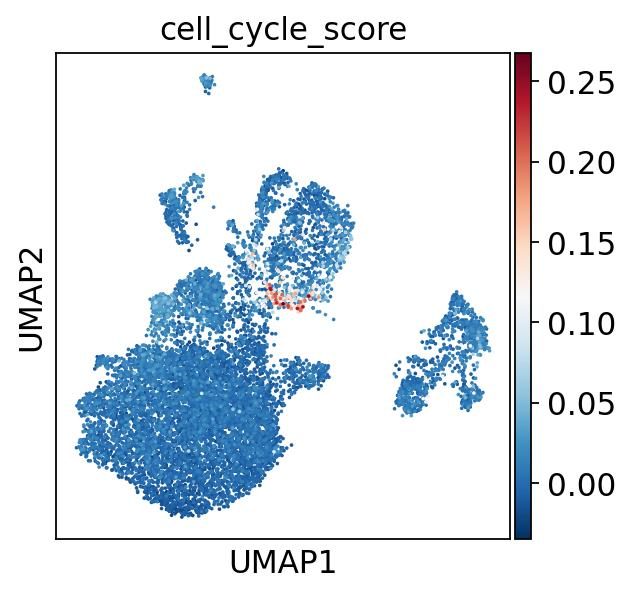

In [64]:
sc.pl.umap(tel_sub, color='cell_cycle_score')

In [65]:
sc.tl.score_genes(tel_sub, G2M_phase_genes['x'], score_name="G2M_phase") #average expression of set of genes subtracted with average expression of reference set of genes (randomly samppled from gene_pool)

computing score 'G2M_phase'
    finished: added
    'G2M_phase', score of gene set (adata.obs).
    748 total control genes are used. (0:00:00)


In [66]:
sc.tl.score_genes(tel_sub, S_phase_genes['x'], score_name="S_phase") #average expression of set of genes subtracted with average expression of reference set of genes (randomly samppled from gene_pool)

computing score 'S_phase'
    finished: added
    'S_phase', score of gene set (adata.obs).
    598 total control genes are used. (0:00:00)


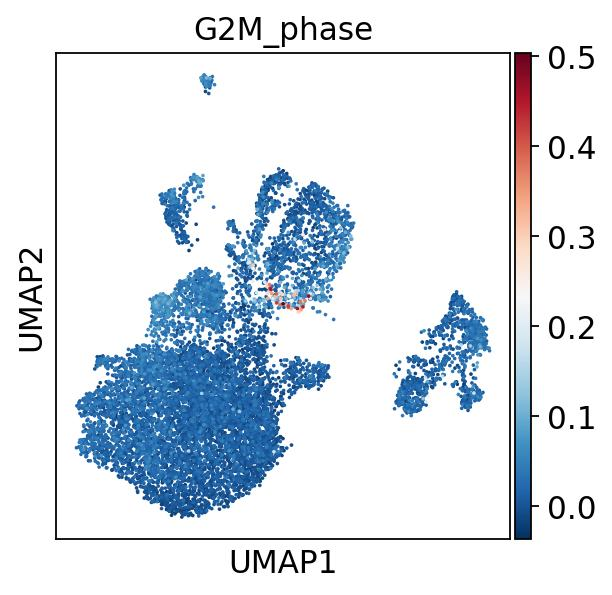

In [67]:
sc.pl.umap(tel_sub, color='G2M_phase') #, save="G2M_phase")

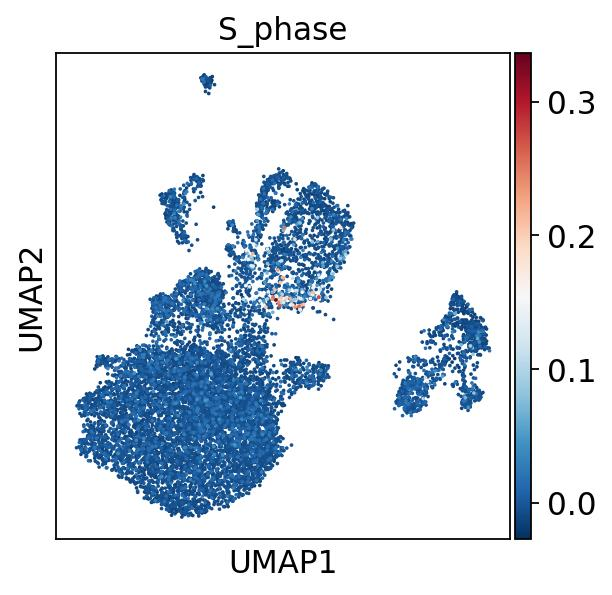

In [68]:
sc.pl.umap(tel_sub, color='S_phase')#, save="_S_phase")

### ScVelo analysis

In [70]:
scv.tl.velocity(tel_sub, mode='stochastic')
scv.tl.velocity_graph(tel_sub) 

computing velocities
    finished (0:01:36) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/112 cores)


  0%|          | 0/10964 [00:00<?, ?cells/s]

    finished (0:00:29) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [71]:
tel_sub.var['velocity_genes'].sum()

674

computing velocity embedding
    finished (0:00:06) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


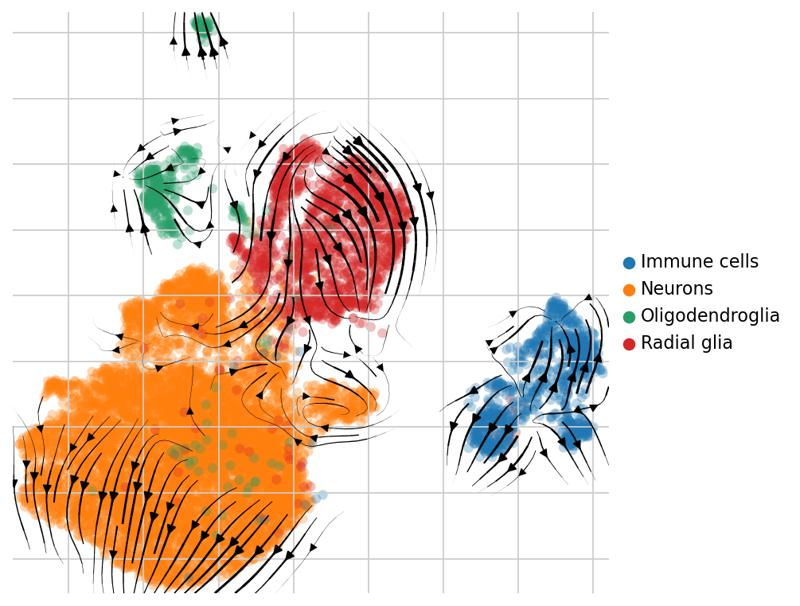

In [72]:
scv.pl.velocity_embedding_stream(tel_sub, basis='umap', legend_fontsize=10, title='', smooth=.8, min_mass=0, 
                                 color=['celltype_major'], legend_loc='right margin', figsize=[6,6]) #stochastic

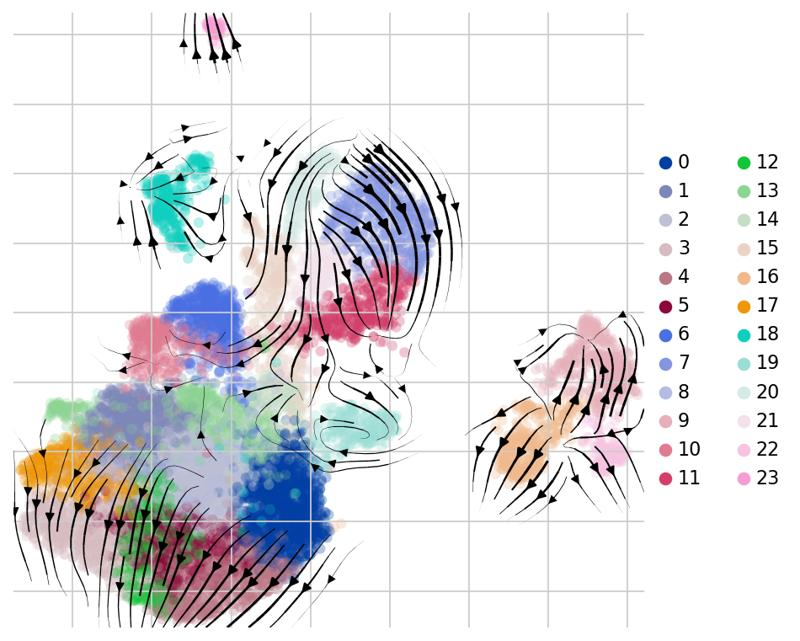

In [73]:
scv.pl.velocity_embedding_stream(tel_sub, basis='umap', legend_fontsize=10, title='', smooth=.8, min_mass=0, 
                                 color=['leiden'], legend_loc='right margin', figsize=[6,6]) #stochastic

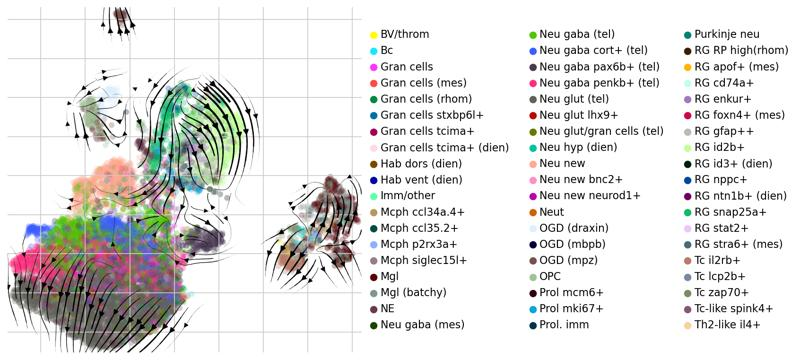

In [74]:
scv.pl.velocity_embedding_stream(tel_sub, basis='umap', legend_fontsize=10, title='', smooth=.8, min_mass=0, 
                                 color=['celltype_detailed_short'], legend_loc='right margin', figsize=[6,6]) #stochastic

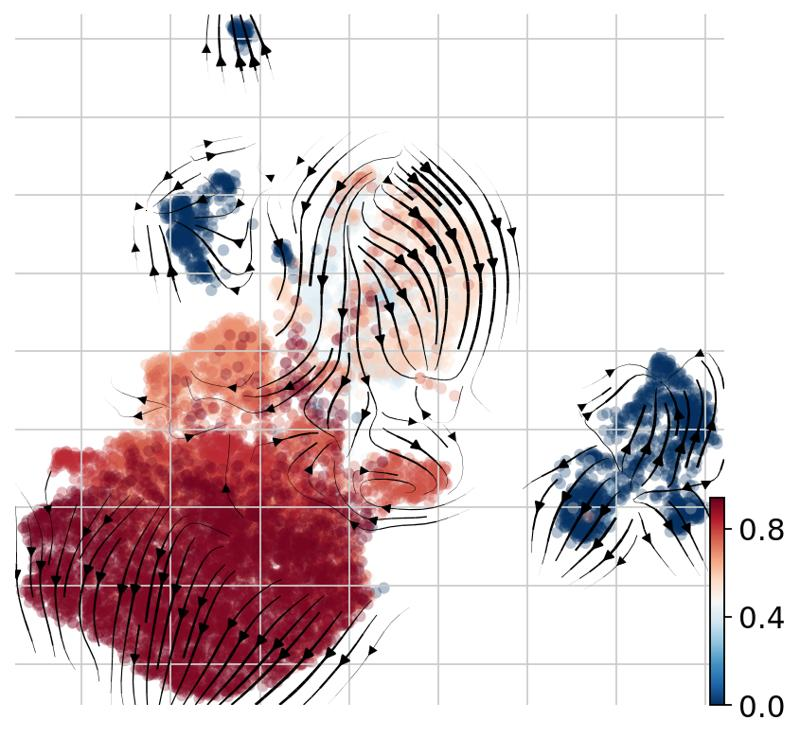

In [75]:
scv.pl.velocity_embedding_stream(tel_sub, basis='umap', legend_fontsize=10, title='', smooth=.8, min_mass=0, 
                                 color=['region_score_max'], legend_loc='right margin', figsize=[6,6]) #stochastic

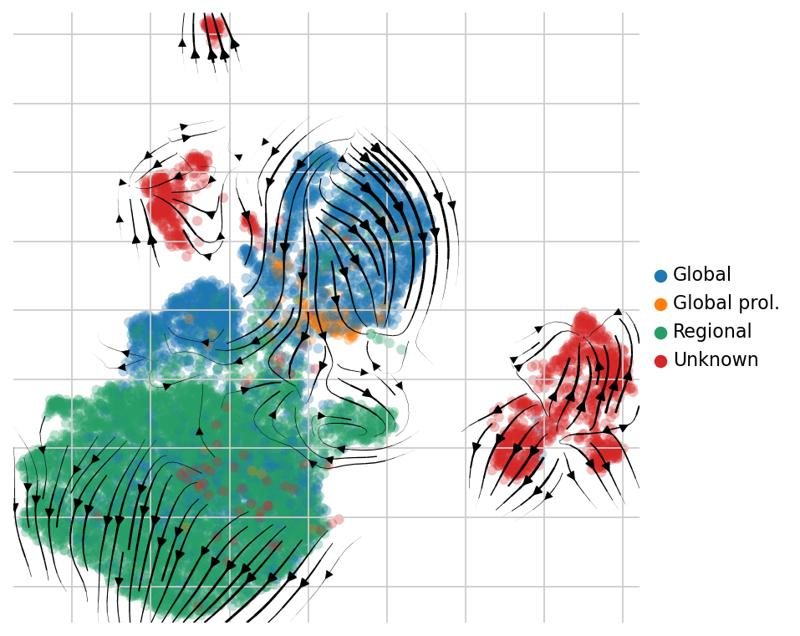

In [76]:
scv.pl.velocity_embedding_stream(tel_sub, basis='umap', legend_fontsize=10, title='', smooth=.8, min_mass=0, 
                                 color=['region_simple'], legend_loc='right margin', figsize=[6,6]) #stochastic

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


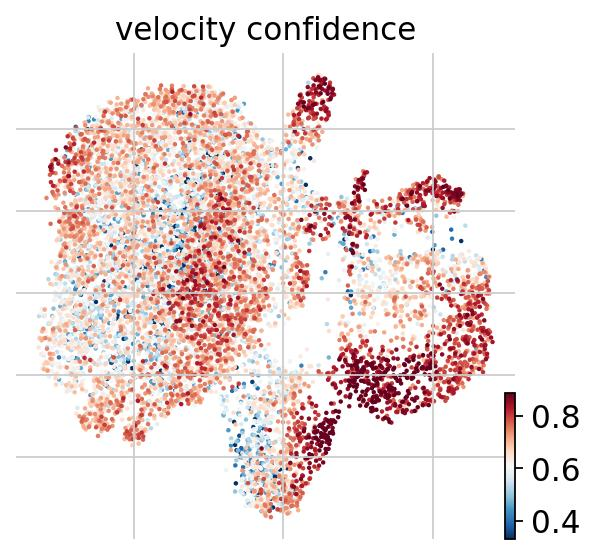

In [68]:
scv.tl.velocity_confidence(tel_sub)
scv.pl.scatter(tel_sub, color='velocity_confidence', perc=[2,98])

## Radial glia and neurons

Load the unprocessed dataset, then subset for only radial glia and neurons and repeat scVelo analysis.  
Also, subset based on the Keep_in_final column (where I flagged some small clusters of putative doublets for exclusion).  

In [31]:
# read in
tel_rg_neu = sc.read_h5ad(filename="tel_sub_prepr")

In [32]:
tel_rg_neu.obs['celltype_major'].cat.categories

Index(['Endothelial cells', 'Ependymal cells', 'Epithelial cells',
       'Erythrocytes', 'Immune cells', 'Neurons', 'Oligodendroglia',
       'Radial glia'],
      dtype='object')

In [33]:
celltypes_kept = ['Neurons', 'Radial glia']

In [34]:
tel_rg_neu = tel_rg_neu[tel_rg_neu.obs['celltype_major'].isin(celltypes_kept)]

In [35]:
tel_rg_neu.obs['celltype_major'].cat.categories

Index(['Neurons', 'Radial glia'], dtype='object')

In [36]:
tel_rg_neu.obs['keep_in_final'].cat.categories

Index(['False', 'True'], dtype='object')

In [37]:
kept_in_final = ['True']

In [38]:
tel_rg_neu = tel_rg_neu[tel_rg_neu.obs['keep_in_final'].isin(kept_in_final)]

In [39]:
tel_rg_neu.obs['keep_in_final'].cat.categories

Index(['True'], dtype='object')

### Preprocessing for scVelo  

Perform standard preprocessing steps to get the UMAP embedding and clustering.  

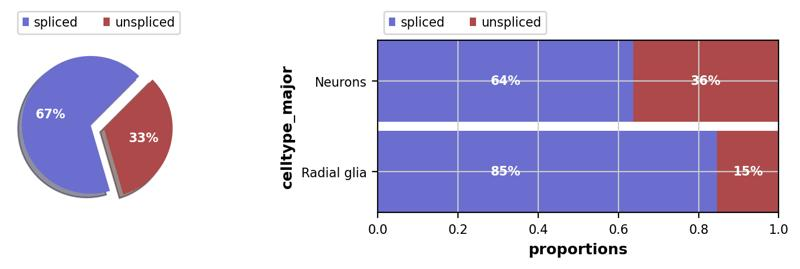

In [40]:
scv.pl.proportions(tel_rg_neu, groupby = 'celltype_major')

#### Normalize, find variable genes, run PCA

In [41]:
scv.pp.filter_and_normalize(tel_rg_neu, log=True)

Trying to set attribute `.obs` of view, copying.


Normalized count data: X, spliced, unspliced.
Logarithmized X.


In [42]:
sc.pp.highly_variable_genes(tel_rg_neu, n_top_genes=3000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


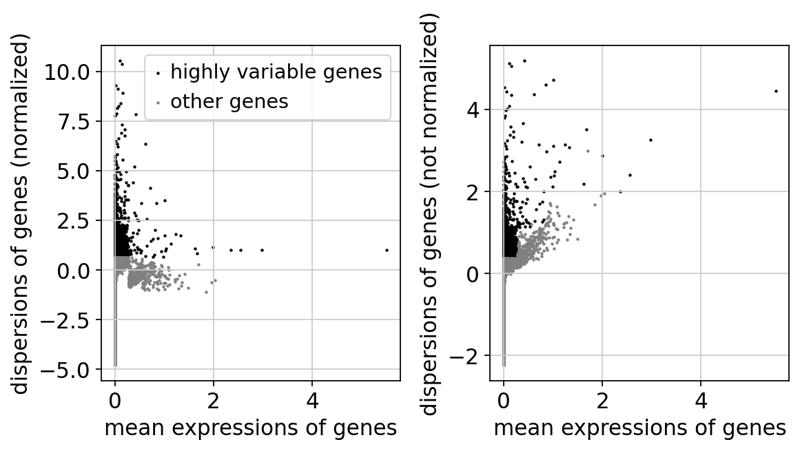

In [43]:
sc.pl.highly_variable_genes(tel_rg_neu)

In [44]:
sc.tl.pca(tel_rg_neu)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:04)


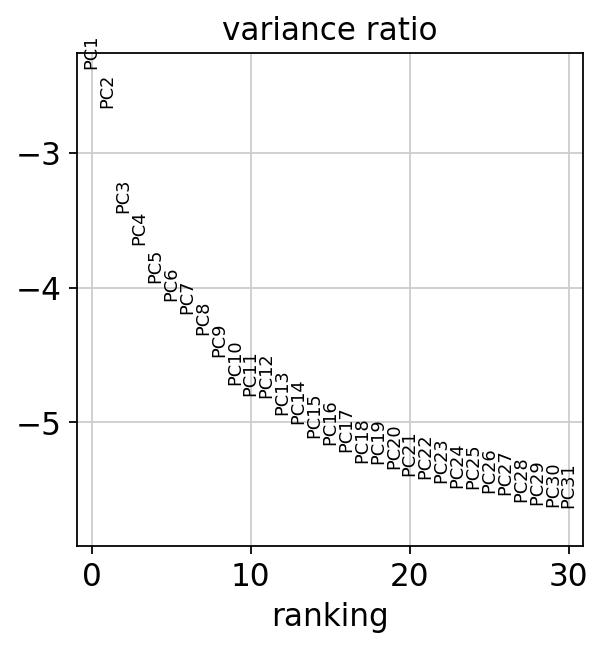

In [45]:
sc.pl.pca_variance_ratio(tel_rg_neu, log=True)

#### Run bbknn
as alternative to neighbors() in workflow

https://scanpy.readthedocs.io/en/stable/external/scanpy.external.pp.bbknn.html

In [46]:
bbknn.bbknn(tel_rg_neu, batch_key='batch')

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


In [47]:
# if n_pcs=None, n_neighbors=None arguments are used will use already existing embedding, in this case based on bbknn
scv.pp.moments(tel_rg_neu, n_pcs=None, n_neighbors=None)

computing moments based on connectivities
    finished (0:00:10) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [48]:
sc.tl.umap(tel_rg_neu)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:39)


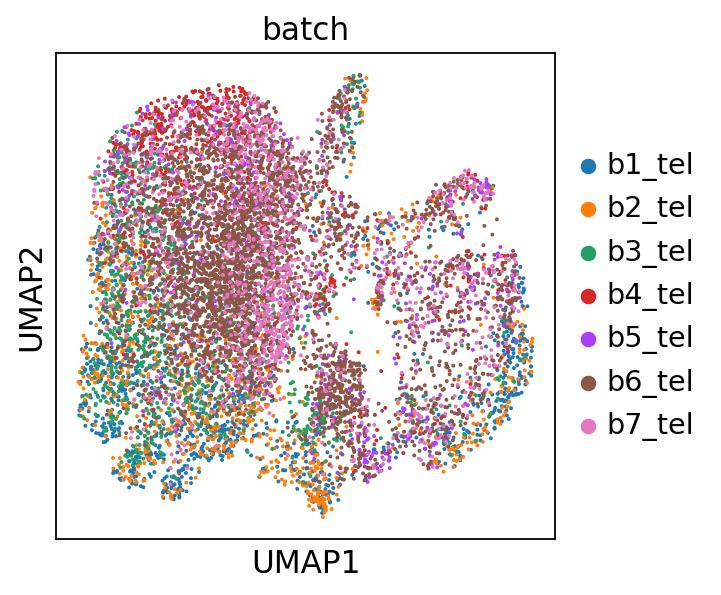

In [49]:
sc.pl.umap(tel_rg_neu, color=['batch']) #with bbknn function

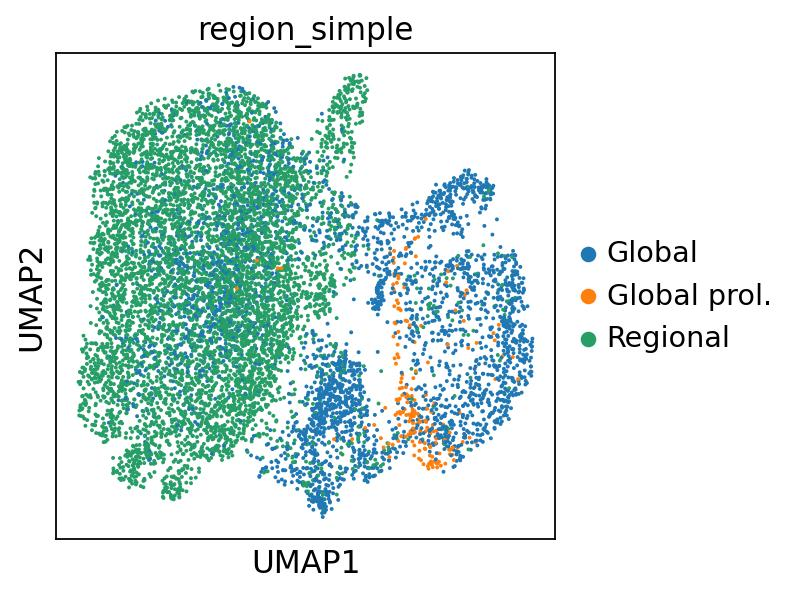

In [50]:
sc.pl.umap(tel_rg_neu, color=['region_simple'])

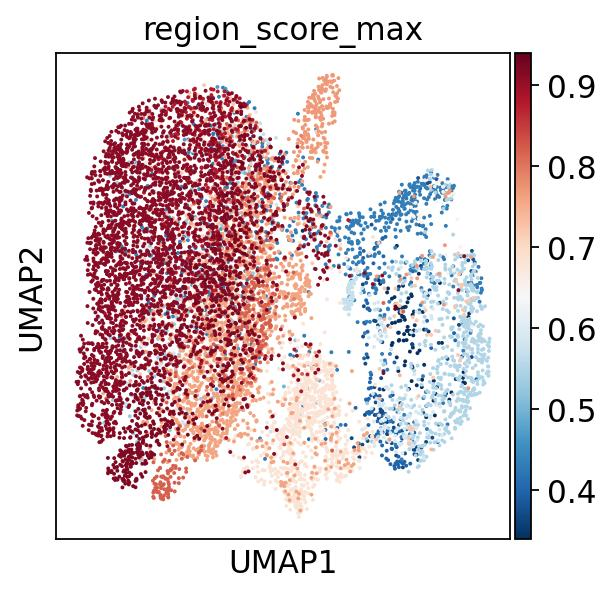

In [51]:
sc.pl.umap(tel_rg_neu, color=['region_score_max'])

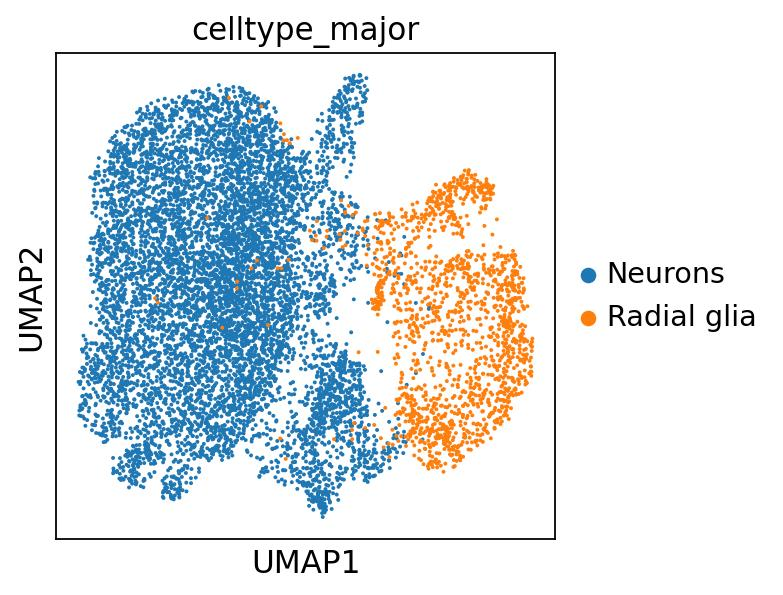

In [52]:
sc.pl.umap(tel_rg_neu, color=['celltype_major'])

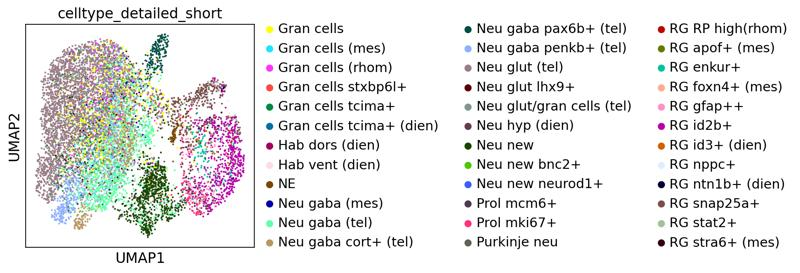

In [53]:
sc.pl.umap(tel_rg_neu, color='celltype_detailed_short')

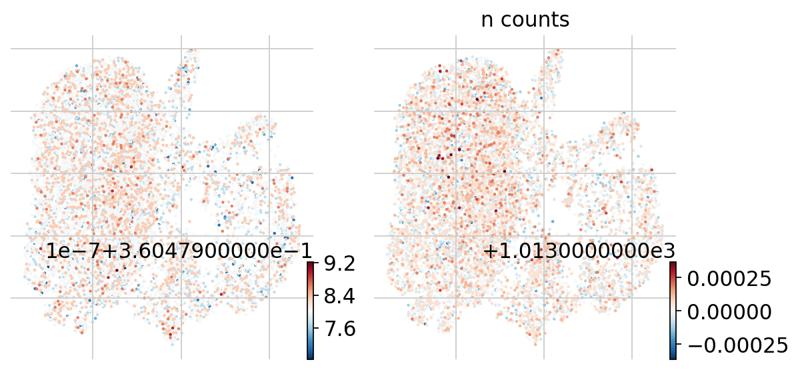

In [54]:
counts_s = scv.utils.sum_var(tel_rg_neu.layers['spliced'])
counts_u = scv.utils.sum_var(tel_rg_neu.layers['unspliced'])
fractions_u = counts_u / (counts_s + counts_u)
scv.pl.scatter(tel_rg_neu, color=[fractions_u, 'n_counts'])

#### Leiden clustering 

In [55]:
sc.tl.leiden(tel_rg_neu, resolution=1.5)

running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


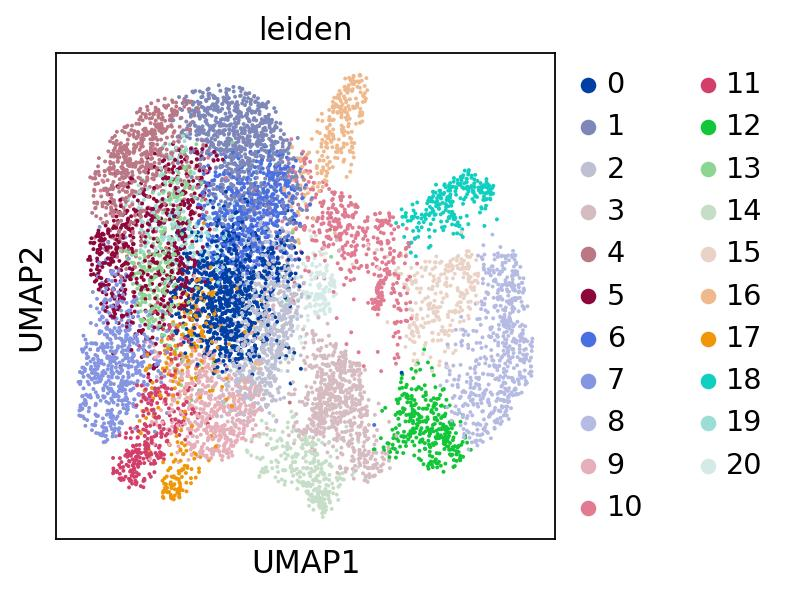

In [56]:
sc.pl.umap(tel_rg_neu, color=['leiden'])

#### Cell cycle score

In [57]:
G2M_phase_genes = pd.read_csv("/local/users/nfresma/zebrafish_G2Mphase_genes.csv")
S_phase_genes = pd.read_csv("/local/users/nfresma/zebrafish_Sphase_genes.csv")

In [58]:
cell_cycle_genes = (G2M_phase_genes['x'].append(S_phase_genes['x']))

In [59]:
sc.tl.score_genes(tel_rg_neu, cell_cycle_genes, score_name="cell_cycle_score")

computing score 'cell_cycle_score'
    finished: added
    'cell_cycle_score', score of gene set (adata.obs).
    798 total control genes are used. (0:00:00)


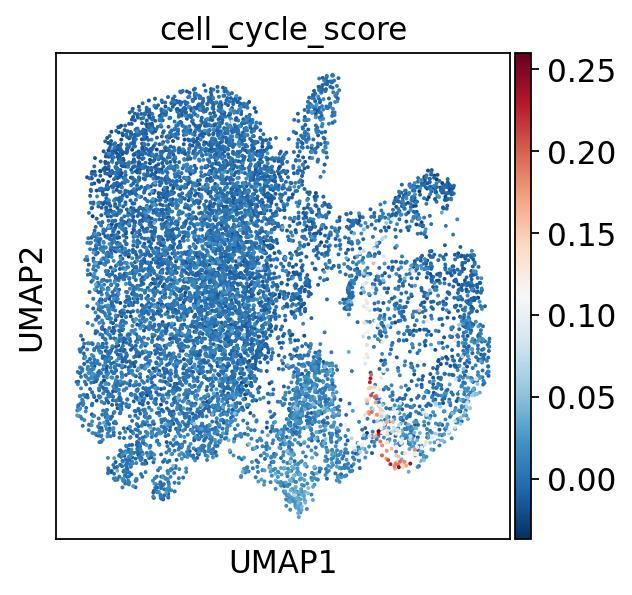

In [60]:
sc.pl.umap(tel_rg_neu, color='cell_cycle_score')

In [61]:
sc.tl.score_genes(tel_rg_neu, G2M_phase_genes['x'], score_name="G2M_phase") #average expression of set of genes subtracted with average expression of reference set of genes (randomly samppled from gene_pool)

computing score 'G2M_phase'
    finished: added
    'G2M_phase', score of gene set (adata.obs).
    698 total control genes are used. (0:00:00)


In [62]:
sc.tl.score_genes(tel_rg_neu, S_phase_genes['x'], score_name="S_phase") #average expression of set of genes subtracted with average expression of reference set of genes (randomly samppled from gene_pool)

computing score 'S_phase'
    finished: added
    'S_phase', score of gene set (adata.obs).
    598 total control genes are used. (0:00:00)


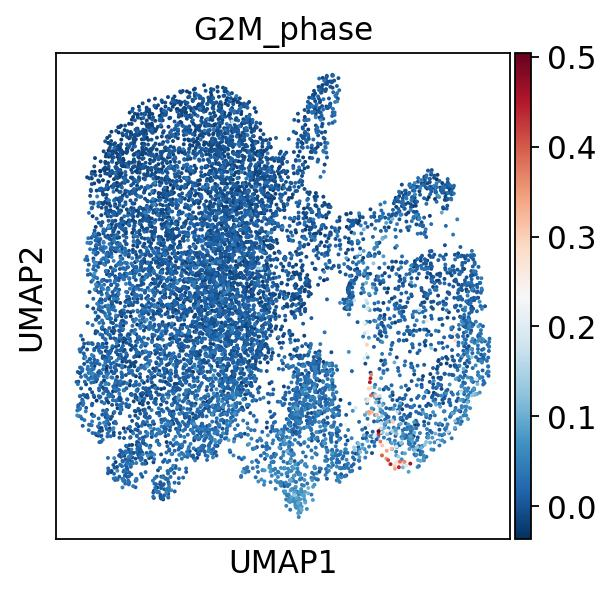

In [63]:
sc.pl.umap(tel_rg_neu, color='G2M_phase') #, save="G2M_phase")

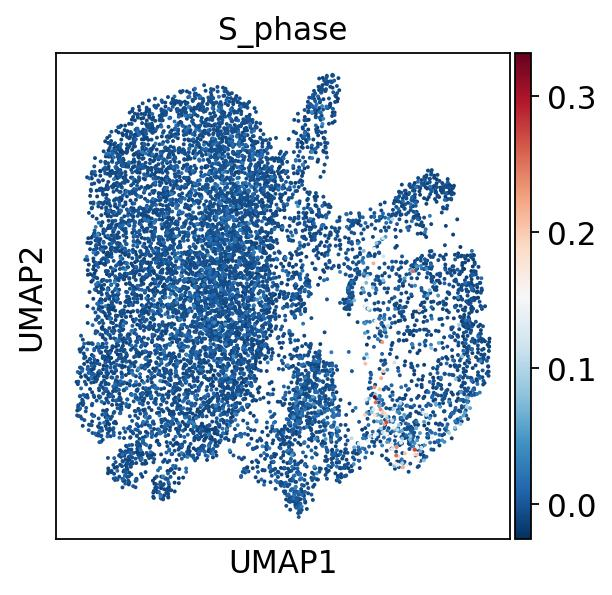

In [64]:
sc.pl.umap(tel_rg_neu, color='S_phase')#, save="_S_phase")

#### Notch activation score

In [20]:
notch_downstream_genes = ['her4.2', 'her4.4', 'her15.1', 'her6', 'her15.2', 'her12', #orthologues to hes1/5
                                                       'hey1', 'hey2' #orthologues to hey
                         ]

In [21]:
notch_downstream_genes

['her4.2', 'her4.4', 'her15.1', 'her6', 'her15.2', 'her12', 'hey1', 'hey2']

In [22]:
sc.tl.score_genes(tel_rg_neu, notch_downstream_genes, score_name="notch_score")

computing score 'notch_score'
    finished: added
    'notch_score', score of gene set (adata.obs).
    250 total control genes are used. (0:00:00)


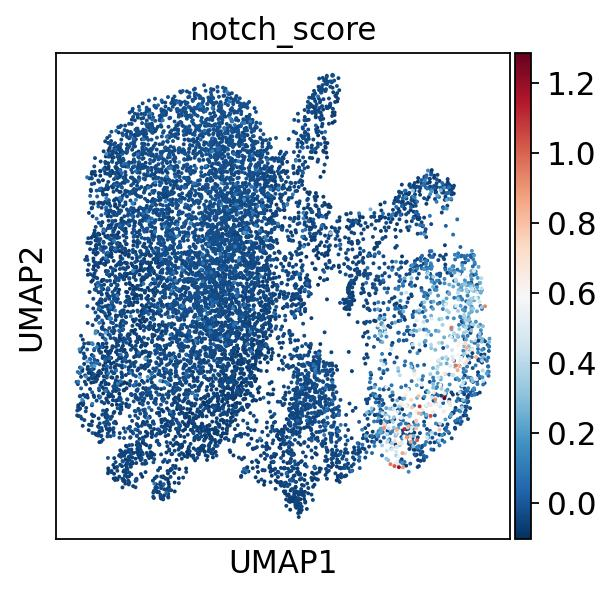

In [23]:
sc.pl.umap(tel_rg_neu, color='notch_score')

### ScVelo analysis

In [65]:
scv.tl.velocity(tel_rg_neu, mode='stochastic')
scv.tl.velocity_graph(tel_rg_neu) 

computing velocities
    finished (0:01:37) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/112 cores)


  0%|          | 0/9608 [00:00<?, ?cells/s]

    finished (0:00:24) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [66]:
tel_rg_neu.var['velocity_genes'].sum()

414

computing velocity embedding
    finished (0:00:05) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


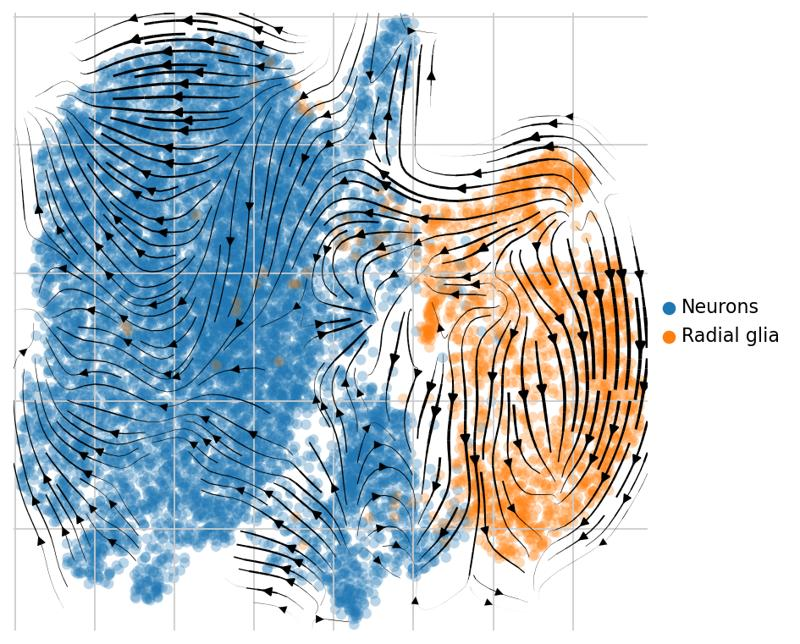

In [67]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=10, title='', smooth=.8, min_mass=0, 
                                 color=['celltype_major'], legend_loc='right margin', figsize=[6,6]) #stochastic

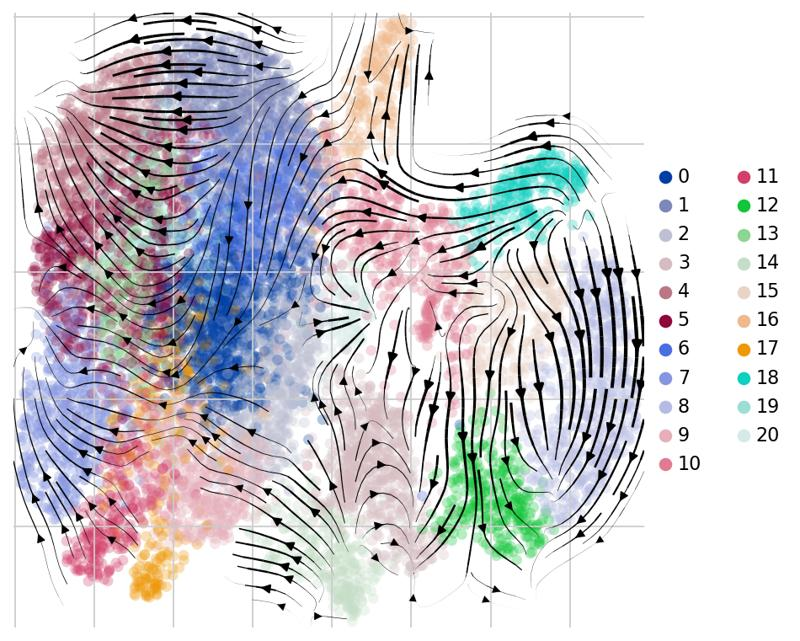

In [68]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=10, title='', smooth=.8, min_mass=0, 
                                 color=['leiden'], legend_loc='right margin', figsize=[6,6]) #stochastic

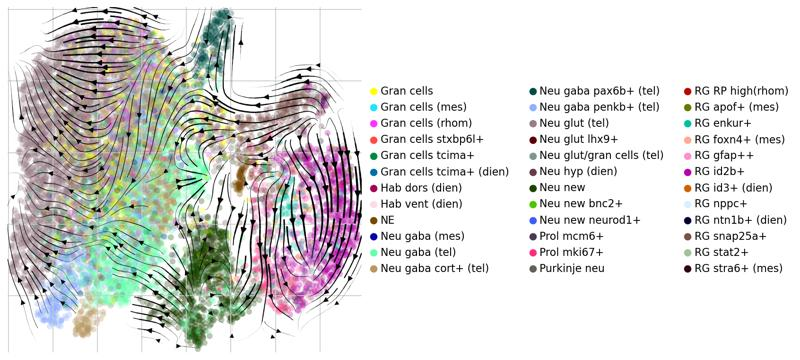

In [69]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=10, title='', smooth=.8, min_mass=0, 
                                 color=['celltype_detailed_short'], legend_loc='right margin', figsize=[6,6]) #stochastic

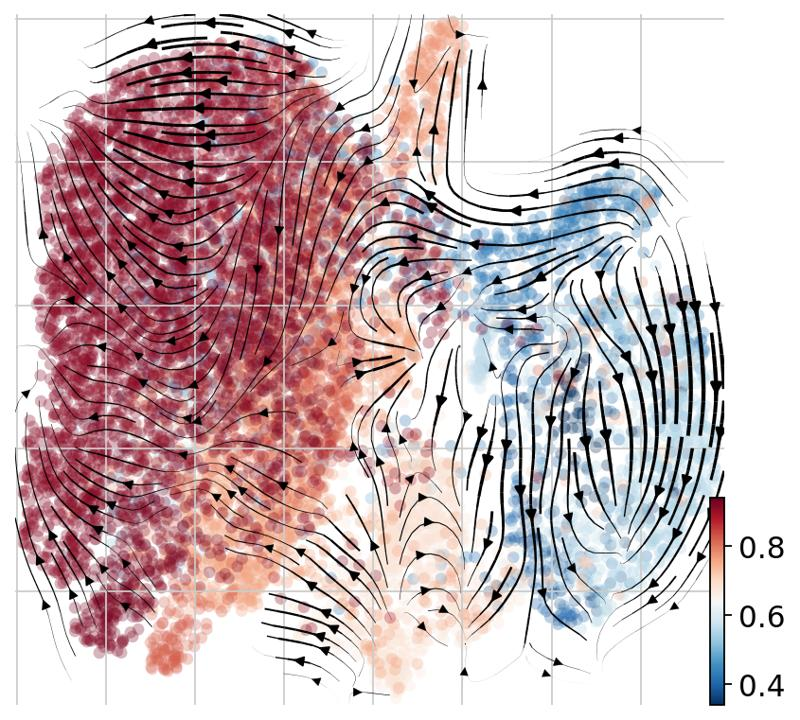

In [70]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=10, title='', smooth=.8, min_mass=0, 
                                 color=['region_score_max'], legend_loc='right margin', figsize=[6,6]) #stochastic

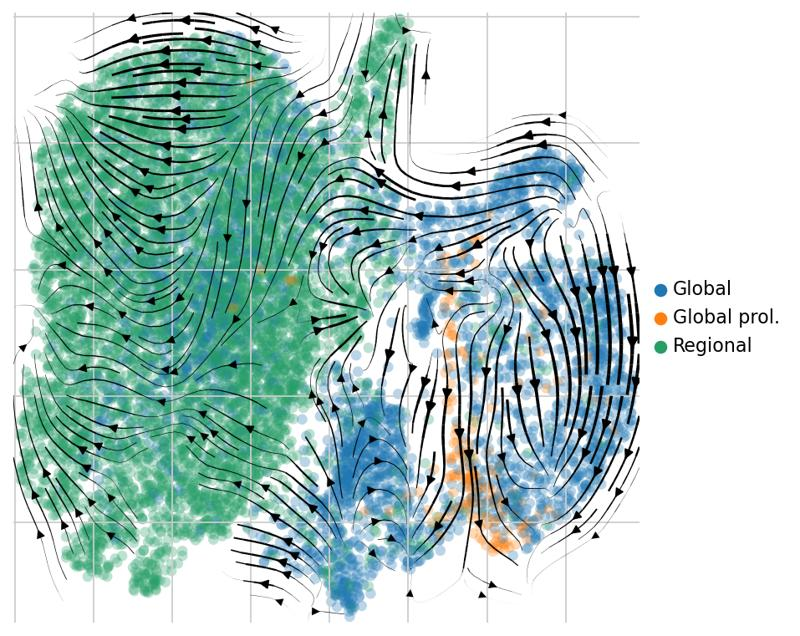

In [71]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=10, title='', smooth=.8, min_mass=0, 
                                 color=['region_simple'], legend_loc='right margin', figsize=[6,6]) #stochastic

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


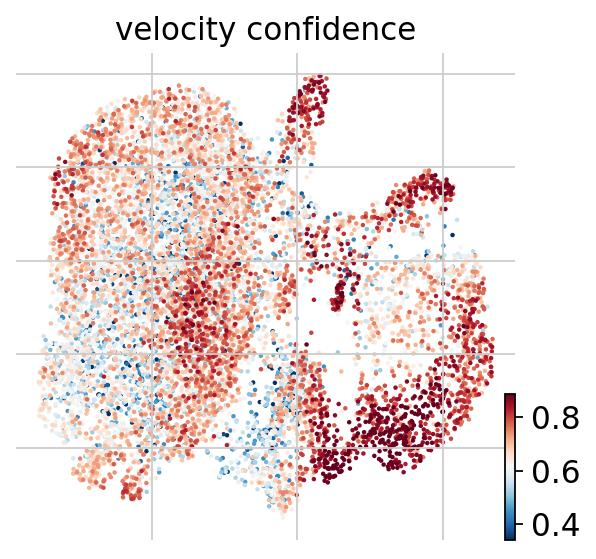

In [72]:
scv.tl.velocity_confidence(tel_rg_neu)
scv.pl.scatter(tel_rg_neu, color='velocity_confidence', perc=[2,98])

#### Save RG/neu subset to disk after processing

Save after running scVelo for easier pick up for figure making.

In [24]:
tel_rg_neu.write(filename="tel_rg_neu_scv", compression='gzip')

In [2]:
# read in
tel_rg_neu = sc.read_h5ad(filename="tel_rg_neu_scv")

In [3]:
tel_rg_neu

AnnData object with n_obs × n_vars = 9608 × 32520
    obs: 'orig_barcode', 'batch', 'fixation', 'celltype_major', 'celltype_detailed', 'celltype_detailed_short', 'keep_in_final', 'region_simple', 'region_detailed', 'region_score_max', 'region_score_max_name', 'region_score_tel', 'region_score_dien', 'region_score_mes', 'region_score_rhom', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'leiden', 'cell_cycle_score', 'G2M_phase', 'S_phase', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'notch_score'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'batch_colors', 'celltype_detailed_short_colors', 'celltype_major_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'region_simple_colors', 'umap', 'velocity_graph', 've

### Export figures

In [4]:
# try range of parameters to improve figure look
# important: frameon = False removes the background grid !!
scv.set_figure_params(style='scvelo', dpi=100, dpi_save=150, frameon=False, 
                          vector_friendly=False, transparent=True, fontsize=12, 
                          figsize=None, color_map=None, facecolor=None, 
                          format='pdf', ipython_format='png2x')

In [4]:
col_celltype_major = {'Neurons' : '#80b1d3', 
                       'Radial glia' : '#bebada'}

saving figure to file ./figures/scvelo_tel_embstr_mct.pdf


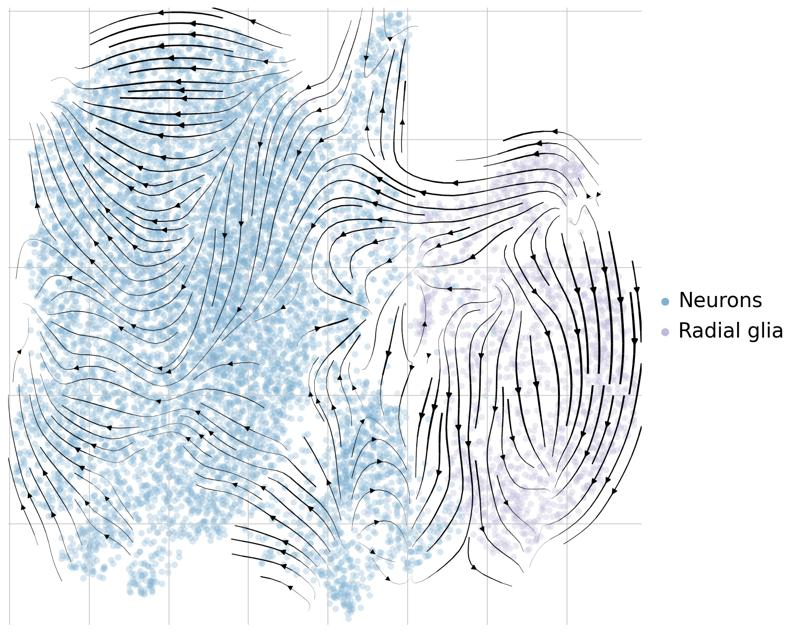

In [18]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=18, title='', smooth=.8, min_mass=3, 
                                 color=['celltype_major'], palette=col_celltype_major, legend_loc='right margin', figsize=[10,10], save='tel_embstr_mct') #stochastic

In [ ]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=18, title='', smooth=.8, min_mass=3, 
                                 color=['celltype_major'], palette=col_celltype_major, legend_loc='right margin', figsize=[10,10])# save='tel_embstr_mct') #stochastic

In [5]:
# select darker version of colors used in Fig2 (from pallette Paired 12-class)
col_region_simple = {'Global' : '#1f78b4', 
                    'Global prol.' : '#33a02c',
                    'Regional' : '#ff7f00'}

saving figure to file ./figures/scvelo_tel_embstr_rgp.pdf


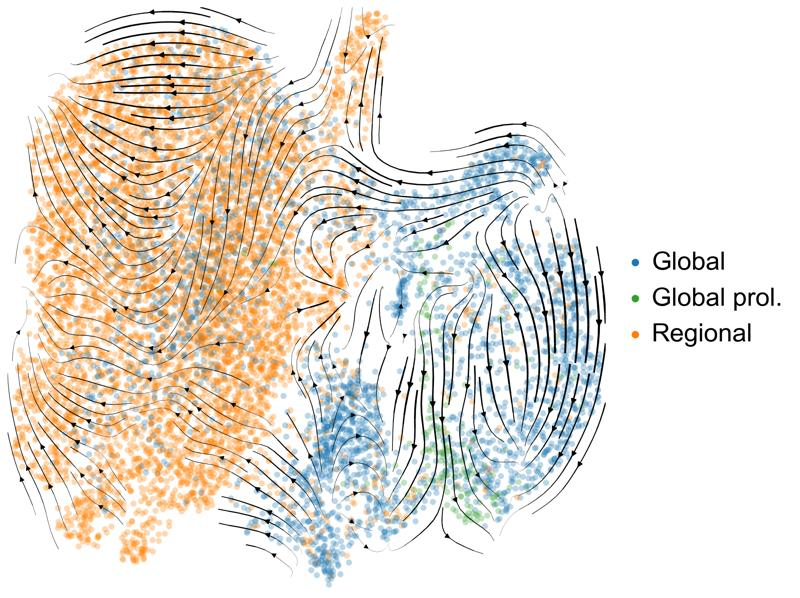

In [11]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=24, title='', smooth=.8, min_mass=3, 
                                 color=['region_simple'], palette=col_region_simple,
                                 legend_loc='right margin', figsize=[10,10], save='tel_embstr_rgp.pdf') #stochastic

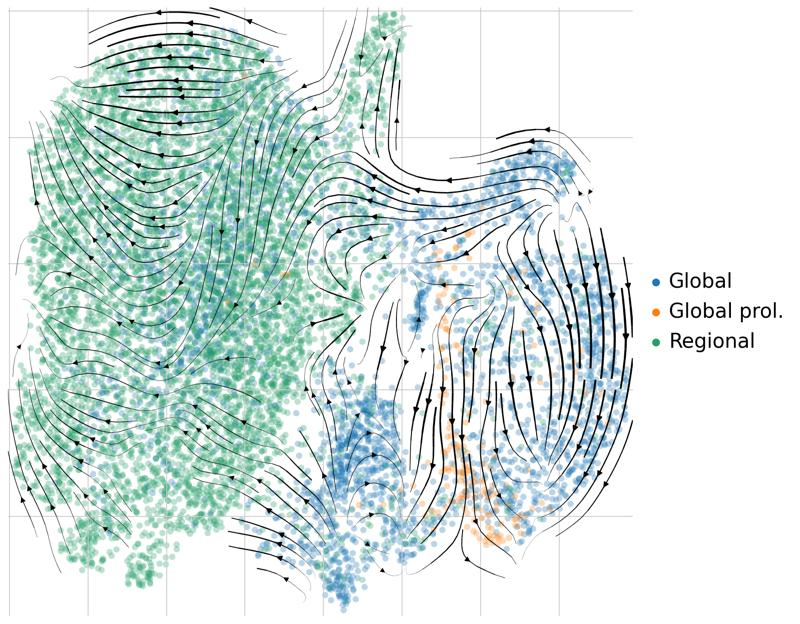

In [77]:
# old version (default colors)
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=18, title='', smooth=.8, min_mass=3, 
                                 color=['region_simple'], legend_loc='right margin', figsize=[10,10])#, save='tel_embstr_rgp' #stochastic

saving figure to file ./figures/scvelo_tel_embstr_rsmax.pdf


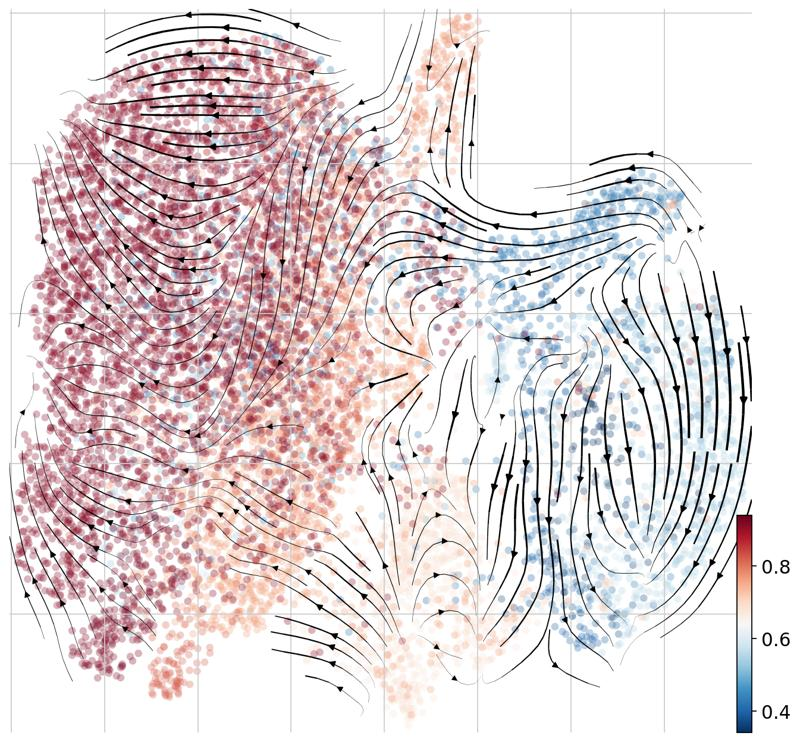

In [20]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=18, title='', smooth=.8, min_mass=3, 
                                 color=['region_score_max'], legend_loc='right margin', figsize=[10,10], save='tel_embstr_rsmax') #stochastic

saving figure to file ./figures/scvelo_tel_embstr_rstel.pdf


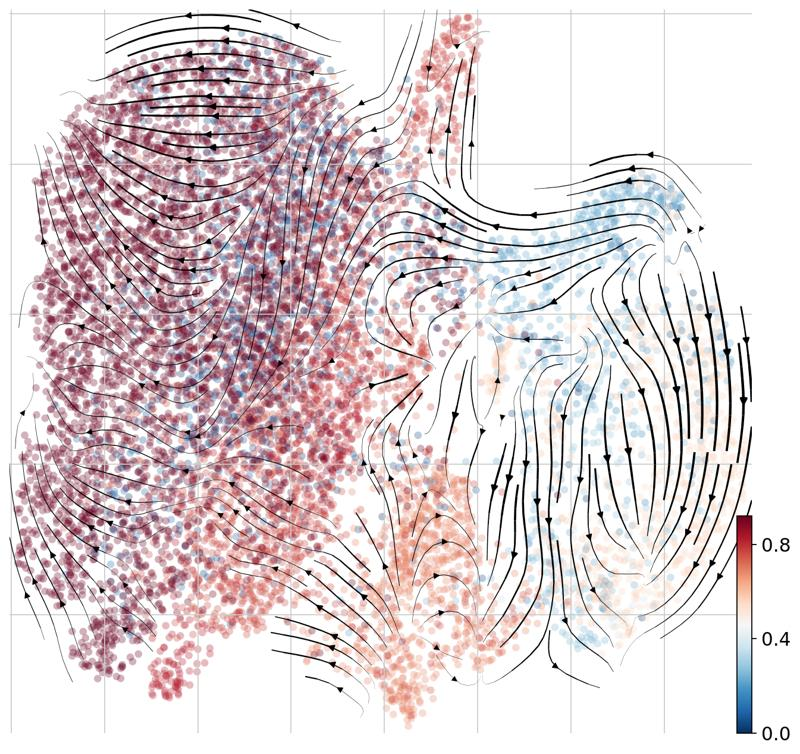

In [21]:
#scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=18, title='', smooth=.8, min_mass=3, 
#                                 color=['region_score_tel'], legend_loc='right margin', figsize=[10,10], save='tel_embstr_rstel') #stochastic

saving figure to file ./figures/scvelo_tel_embstr_rstel.png


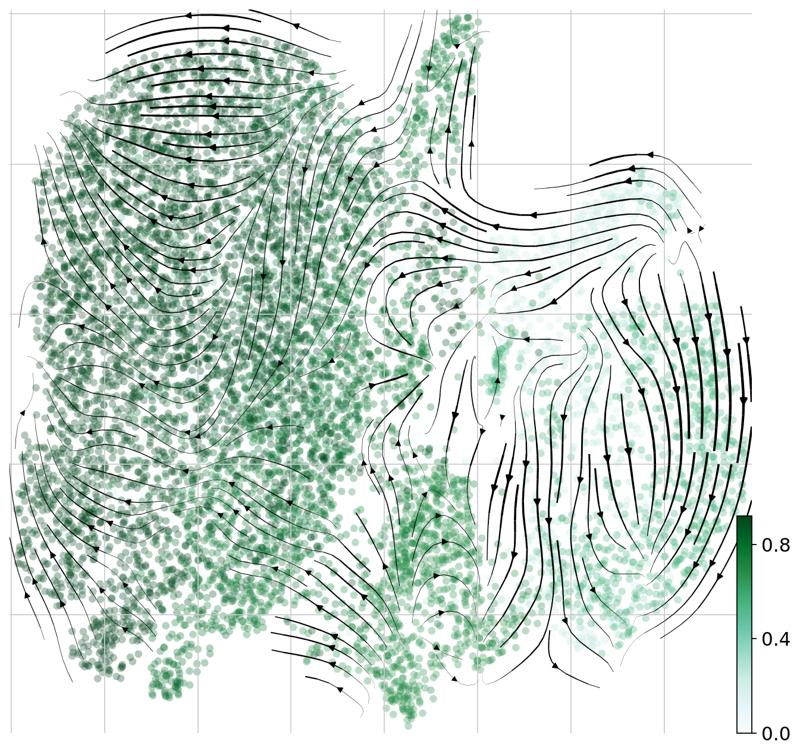

In [7]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=18, title='', smooth=.8, min_mass=3, 
                                 color=['region_score_tel'], color_map='BuGn', legend_loc='right margin', figsize=[10,10], save='tel_embstr_rstel.png') #stochastic

Newer version: custom sequential colormap (lowest and highest values correspond to categorical colors for global/regional)  
Based on 
https://www.delftstack.com/howto/matplotlib/custom-colormap-using-python-matplotlib/#use-colors-attribute-of-listedcolormap-object-to-create-a-custom-listed-colormap-in-python
(tutorial on custom colormaps)  
https://matplotlib.org/stable/gallery/color/named_colors.html (color names)

In [13]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

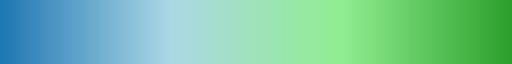

In [11]:
glo_reg_list=["tab:blue", "lightblue", "lightgreen", "tab:green"]
glo_reg_pal=LinearSegmentedColormap.from_list('GloRegCmap', colors=glo_reg_list, N=256)
glo_reg_pal

In [13]:
print(glo_reg_pal)

saving figure to file ./figures/scvelo_tel_embstr_rstel.png


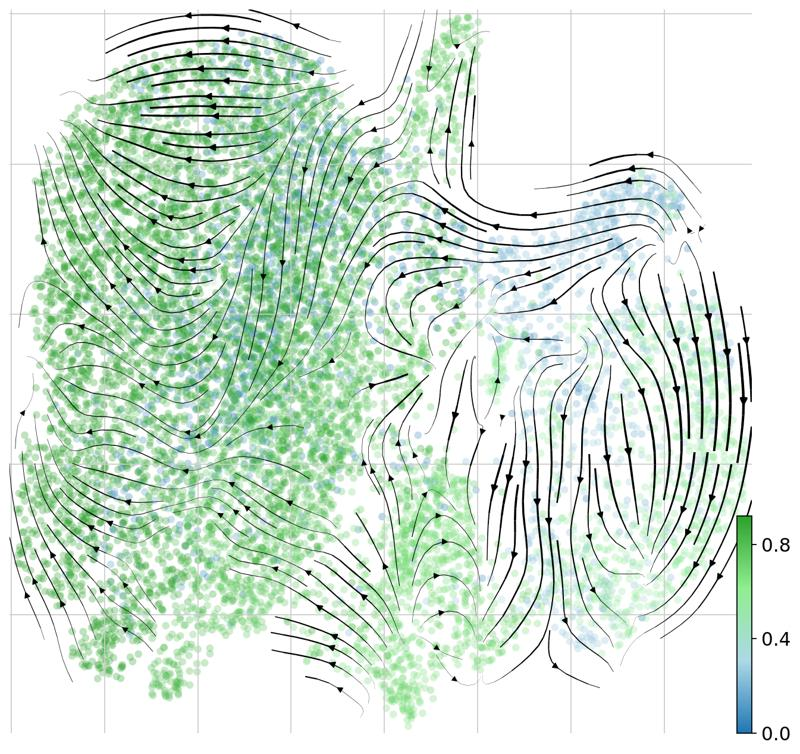

In [19]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=18, title='', smooth=.8, min_mass=3, 
                                 color=['region_score_tel'], color_map=glo_reg_pal, legend_loc='right margin', figsize=[10,10],
                                save='tel_embstr_rstel.png')
#,save='tel_embstr_rstel.png'#stochastic

Alternative pallette - regional in orange instead of green? (for clearer separation)  

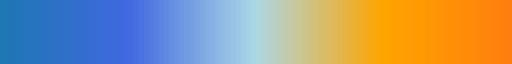

In [16]:
# old version with python colors
glo_reg_list=["tab:blue", "royalblue", "lightblue", "orange", "tab:orange"]
# new version with colors from Paired pallette
#glo_reg_list=["#1f78b4", "#a6cee3", "#fdbf6f", "#ff7f00"]
glo_reg_pal=LinearSegmentedColormap.from_list('GloRegCmap', colors=glo_reg_list, N=100)
glo_reg_pal

saving figure to file ./figures/scvelo_tel_embstr_rstel_blor.pdf


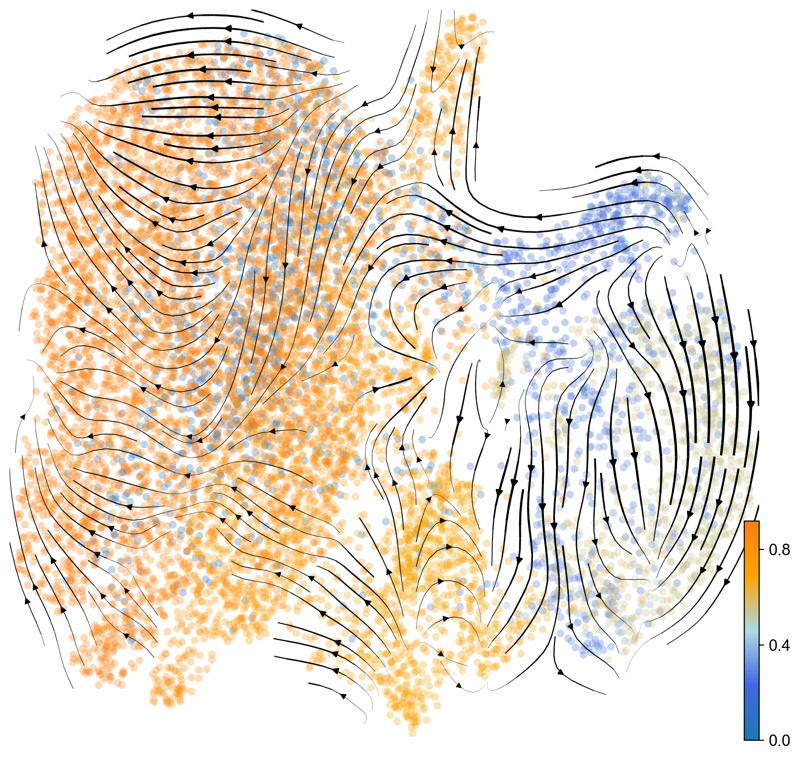

In [17]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=18, title='', smooth=.8, min_mass=3, 
                                 color=['region_score_tel'], color_map=glo_reg_pal, legend_loc='right margin', figsize=[10,10],
                                save='tel_embstr_rstel_blor.pdf')
#,save='tel_embstr_rstel.png'#stochastic

In [25]:
tel_rg_neu.obs

orig_barcode   batch fixation  \
B1.T_AAAGAGACGGATTC-1      b1_tel:AAAGAGACGGATTCx  b1_tel    fresh   
B1.T_AAAGAGACTAGACC-1      b1_tel:AAAGAGACTAGACCx  b1_tel    fresh   
B1.T_AAAGAGACTCTACT-1      b1_tel:AAAGAGACTCTACTx  b1_tel    fresh   
B1.T_AAAGGCCTAGATCC-1      b1_tel:AAAGGCCTAGATCCx  b1_tel    fresh   
B1.T_AAATACTGGAATAG-1      b1_tel:AAATACTGGAATAGx  b1_tel    fresh   
...                                           ...     ...      ...   
B7.T_TTGGAACGTGCGGTAA-1  b7_tel:TTGGAACGTGCGGTAAx  b7_tel    fresh   
B7.T_TTGGCAACAGCCAGAA-1  b7_tel:TTGGCAACAGCCAGAAx  b7_tel    fresh   
B7.T_TTGTAGGAGCGGATCA-1  b7_tel:TTGTAGGAGCGGATCAx  b7_tel    fresh   
B7.T_TTTGCGCGTCAGATAA-1  b7_tel:TTTGCGCGTCAGATAAx  b7_tel    fresh   
B7.T_TTTGTCATCGGATGTT-1  b7_tel:TTTGTCATCGGATGTTx  b7_tel    fresh   

                        celltype_major               celltype_detailed  \
B1.T_AAAGAGACGGATTC-1          Neurons     Neurons glutamatargic (tel)   
B1.T_AAAGAGACTAGACC-1          Neurons  Neurons gabaergic penkb+ (tel)   
B1.T_AAAGAGACTCTACT-1          Neurons     Neurons glutamatargic (tel)   
B1.T_AAAGGCCTAGATCC-1          Neurons  Neurons gabaergic pax6b+ (tel)   
B1.T_AAATACTGGAATAG-1          Neurons                   Granule cells   
...                                ...                             ...   
B7.T_TTGGAACGTGCGGTAA-1    Radial glia               Radial glia id2b+   
B7.T_TTGGCAACAGCCAGAA-1    Radial glia            Radial glia snap25a+   
B7.T_TTGTAGGAGCGGATCA-1    Radial glia       Radial glia ntn1b+ (dien)   
B7.T_TTTGCGCGTCAGATAA-1    Radial glia              Radial glia enkur+   
B7.T_TTTGTCATCGGATGTT-1    Radial glia               Radial glia id2b+   

                        celltype_detailed_short keep_in_final region_simple  \
B1.T_AAAGAGACGGATTC-1            Neu glut (tel)          True      Regional   
B1.T_AAAGAGACTAGACC-1     Neu gaba penkb+ (tel)          True      Regional   
B1.T_AAAGAGACTCTACT-1            Neu glut (tel)          True      Regional   
B1.T_AAAGGCCTAGATCC-1     Neu gaba pax6b+ (tel)          True      Regional   
B1.T_AAATACTGGAATAG-1                Gran cells          True        Global   
...                                         ...           ...           ...   
B7.T_TTGGAACGTGCGGTAA-1                RG id2b+          True        Global   
B7.T_TTGGCAACAGCCAGAA-1             RG snap25a+          True        Global   
B7.T_TTGTAGGAGCGGATCA-1        RG ntn1b+ (dien)          True      Regional   
B7.T_TTTGCGCGTCAGATAA-1               RG enkur+          True        Global   
B7.T_TTTGTCATCGGATGTT-1                RG id2b+          True        Global   

                        region_detailed  region_score_max  ...     n_counts  \
B1.T_AAAGAGACGGATTC-1               Tel              0.91  ...  1013.000061   
B1.T_AAAGAGACTAGACC-1               Tel              0.92  ...  1013.000061   
B1.T_AAAGAGACTCTACT-1               Tel              0.91  ...  1012.999939   
B1.T_AAAGGCCTAGATCC-1               Tel              0.77  ...  1013.000061   
B1.T_AAATACTGGAATAG-1             Multi              0.44  ...  1013.000061   
...                                 ...               ...  ...          ...   
B7.T_TTGGAACGTGCGGTAA-1           Multi              0.55  ...  1012.999878   
B7.T_TTGGCAACAGCCAGAA-1           Multi              0.43  ...  1013.000122   
B7.T_TTGTAGGAGCGGATCA-1            Dien              0.77  ...  1013.000000   
B7.T_TTTGCGCGTCAGATAA-1           Multi              0.34  ...  1013.000000   
B7.T_TTTGTCATCGGATGTT-1           Multi              0.55  ...  1013.000000   

                         leiden  cell_cycle_score  G2M_phase   S_phase  \
B1.T_AAAGAGACGGATTC-1         7         -0.014192  -0.008607 -0.011870   
B1.T_AAAGAGACTAGACC-1        11          0.007028   0.038323 -0.016007   
B1.T_AAAGAGACTCTACT-1         7         -0.006532  -0.011538 -0.006334   
B1.T_AAAGGCCTAGATCC-1        16         -0.000441   0.013330 -0.010812   
B1.T_AAATACTGGAATAG-1        13        

saving figure to file ./figures/scvelo_tel_embstr_ccsc.png


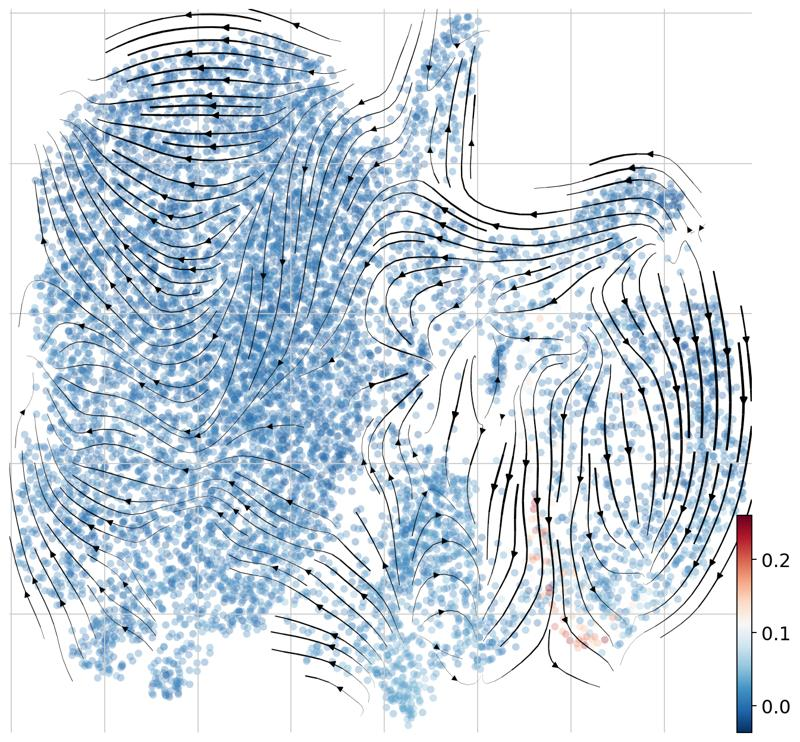

In [26]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=18, title='', smooth=.8, min_mass=3, 
                                 color=['cell_cycle_score'], legend_loc='right margin', figsize=[10,10], save='tel_embstr_ccsc.png') #stochastic

saving figure to file ./figures/scvelo_tel_embstr_nsc.png


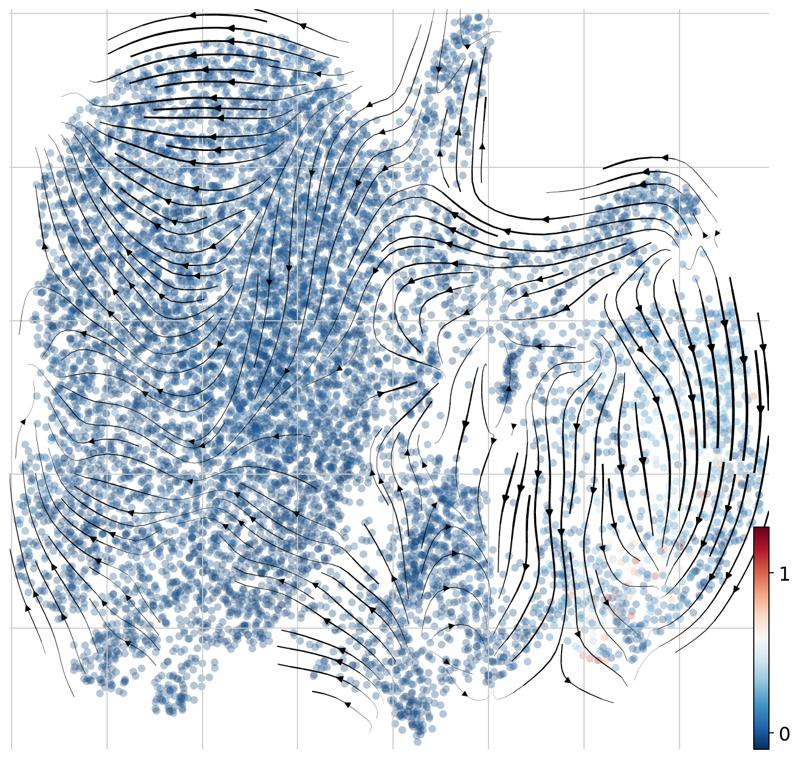

In [27]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=18, title='', smooth=.8, min_mass=3, 
                                 color=['notch_score'], legend_loc='right margin', figsize=[10,10], save='tel_embstr_nsc.png') #stochastic

#### Detailed celltype - rearrange metadata

Since there are too many detailed cell types, many of which are present at small numbers or irrelevant to our question, theplots tend to be overcrowded and unclear. Here I group the detailed cell types into 7 major categories that are of interest for the paper. Grouped cell names entered as another metadata category.

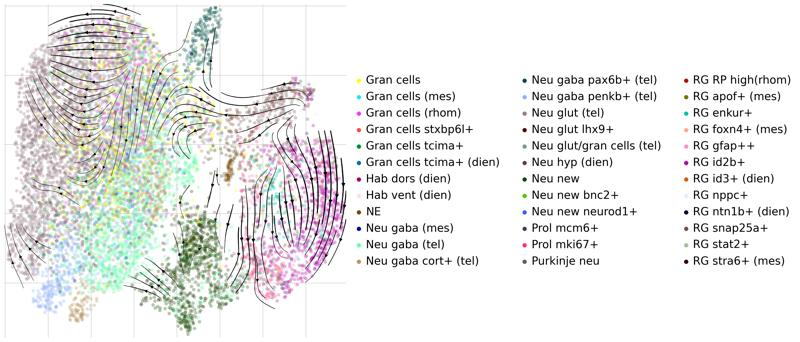

In [8]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=18, 
                                 title='', smooth=.8, min_mass=4, 
                                 color=['celltype_detailed_short'],
                                 legend_loc='right margin', 
                                 figsize=[10,10])#, save='tel_embstr_dct' #stochastic

In [18]:
tel_rg_neu.obs.celltype_detailed.cat.categories

Index(['Granule cells', 'Granule cells (mes)', 'Granule cells (rhom)',
       'Granule cells stxbp6l+ ', 'Granule cells tcima+',
       'Granule cells tcima+ (dien)', 'Habenula dorsal (dien)',
       'Habenula ventral (dien)', 'Neuroepithelial cells',
       'Neurons gabaergic (mes)', 'Neurons gabaergic (tel)',
       'Neurons gabaergic cort+ (tel)', 'Neurons gabaergic pax6b+ (tel)',
       'Neurons gabaergic penkb+ (tel)', 'Neurons glutamatargic (tel)',
       'Neurons glutamatergic lhx9+',
       'Neurons glutamatergic/granule cells (tel)',
       'Neurons hypothalamus (dien)', 'Neurons newborn',
       'Neurons newborn bnc2+', 'Neurons newborn neurod1+',
       'Proliferating cells mcm6+', 'Proliferating cells mki67+',
       'Purkinje neurons', 'Radial glia RP high(rhom)',
       'Radial glia apof+ (mes)', 'Radial glia enkur+',
       'Radial glia foxn4+ (mes)', 'Radial glia gfap++', 'Radial glia id2b+',
       'Radial glia id3+ (dien)', 'Radial glia nppc+',
       'Radial glia ntn

In [19]:
tel_rg_neu.obs.celltype_detailed.value_counts()

Neurons glutamatargic (tel)                  2699
Neurons gabaergic (tel)                      1470
Neurons newborn                               840
Neurons gabaergic penkb+ (tel)                792
Granule cells                                 684
Radial glia id2b+                             578
Neurons gabaergic cort+ (tel)                 453
Radial glia snap25a+                          386
Neurons glutamatergic/granule cells (tel)     341
Neurons gabaergic pax6b+ (tel)                201
Granule cells (rhom)                          198
Granule cells tcima+                          177
Proliferating cells mki67+                    113
Radial glia gfap++                            113
Radial glia enkur+                             99
Proliferating cells mcm6+                      76
Neuroepithelial cells                          62
Neurons glutamatergic lhx9+                    58
Neurons gabaergic (mes)                        47
Radial glia id3+ (dien)                        44


In [5]:
celltype_detailed_selective = tel_rg_neu.obs.celltype_detailed

In [6]:
type(celltype_detailed_selective)

pandas.core.series.Series

In [7]:
celltype_detailed_selective

B1.T_AAAGAGACGGATTC-1         Neurons glutamatargic (tel)
B1.T_AAAGAGACTAGACC-1      Neurons gabaergic penkb+ (tel)
B1.T_AAAGAGACTCTACT-1         Neurons glutamatargic (tel)
B1.T_AAAGGCCTAGATCC-1      Neurons gabaergic pax6b+ (tel)
B1.T_AAATACTGGAATAG-1                       Granule cells
                                        ...              
B7.T_TTGGAACGTGCGGTAA-1                 Radial glia id2b+
B7.T_TTGGCAACAGCCAGAA-1              Radial glia snap25a+
B7.T_TTGTAGGAGCGGATCA-1         Radial glia ntn1b+ (dien)
B7.T_TTTGCGCGTCAGATAA-1                Radial glia enkur+
B7.T_TTTGTCATCGGATGTT-1                 Radial glia id2b+
Name: celltype_detailed, Length: 9608, dtype: category
Categories (36, object): ['Granule cells', 'Granule cells (mes)', 'Granule cells (rhom)', 'Granule cells stxbp6l+ ', ..., 'Radial glia ntn1b+ (dien)', 'Radial glia snap25a+', 'Radial glia stat2+', 'Radial glia stra6+ (mes)']

In [13]:
celltype_detailed_selective = celltype_detailed_selective.replace('Granule cells', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Granule cells (mes)', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Granulle cells', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Granule cells (rhom)', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Granule cells stxbp6l+ ', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Granule cells tcima+', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Granule cells tcima+ (dien)', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Habenula dorsal (dien)', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Habenula ventral (dien)', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Neuroepithelial cells', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Neurons gabaergic (mes)', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Neurons gabaergic (tel)', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Neurons gabaergic cort+ (tel)', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Neurons gabaergic pax6b+ (tel)', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Neurons gabaergic penkb+ (tel)', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Neurons glutamatargic (tel)', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Neurons glutamatergic lhx9+', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Neurons glutamatergic/granule cells (tel)', 'Neurons (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Neurons hypothalamus (dien)', 'Neurons (other)')

celltype_detailed_selective = celltype_detailed_selective.replace('Neurons newborn bnc2+', 'Neurons newborn')
celltype_detailed_selective = celltype_detailed_selective.replace('Neurons newborn neurod1+', 'Neurons newborn')

celltype_detailed_selective = celltype_detailed_selective.replace('Proliferating cells mcm6+', 'Proliferating cells')
celltype_detailed_selective = celltype_detailed_selective.replace('Proliferating cells mki67+', 'Proliferating cells')

celltype_detailed_selective = celltype_detailed_selective.replace('Purkinje neurons', 'Neurons (other)')

celltype_detailed_selective = celltype_detailed_selective.replace('Radial glia RP high(rhom)', 'Radial glia (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Radial glia apof+ (mes)', 'Radial glia (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Radial glia enkur+', 'Radial glia (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Radial glia foxn4+ (mes)', 'Radial glia (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Radial glia id3+ (dien)', 'Radial glia (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Radial glia nppc+', 'Radial glia (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Radial glia ntn1b+ (dien)', 'Radial glia (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Radial glia stat2+', 'Radial glia (other)')
celltype_detailed_selective = celltype_detailed_selective.replace('Radial glia stra6+ (mes)', 'Radial glia (other)')

celltype_detailed_selective = celltype_detailed_selective.replace('Radial glia gfap++', 'Radial glia her4++')

In [14]:
celltype_detailed_selective

B1.T_AAAGAGACGGATTC-1           Neurons (other)
B1.T_AAAGAGACTAGACC-1           Neurons (other)
B1.T_AAAGAGACTCTACT-1           Neurons (other)
B1.T_AAAGGCCTAGATCC-1           Neurons (other)
B1.T_AAATACTGGAATAG-1           Neurons (other)
                                   ...         
B7.T_TTGGAACGTGCGGTAA-1       Radial glia id2b+
B7.T_TTGGCAACAGCCAGAA-1    Radial glia snap25a+
B7.T_TTGTAGGAGCGGATCA-1     Radial glia (other)
B7.T_TTTGCGCGTCAGATAA-1     Radial glia (other)
B7.T_TTTGTCATCGGATGTT-1       Radial glia id2b+
Name: celltype_detailed, Length: 9608, dtype: category
Categories (7, object): ['Neurons (other)', 'Neurons newborn', 'Proliferating cells', 'Radial glia (other)', 'Radial glia her4++', 'Radial glia id2b+', 'Radial glia snap25a+']

In [15]:
tel_rg_neu.obs['celltype_detailed_selective'] = pd.Categorical(celltype_detailed_selective)

In [16]:
tel_rg_neu.obs

orig_barcode   batch fixation  \
B1.T_AAAGAGACGGATTC-1      b1_tel:AAAGAGACGGATTCx  b1_tel    fresh   
B1.T_AAAGAGACTAGACC-1      b1_tel:AAAGAGACTAGACCx  b1_tel    fresh   
B1.T_AAAGAGACTCTACT-1      b1_tel:AAAGAGACTCTACTx  b1_tel    fresh   
B1.T_AAAGGCCTAGATCC-1      b1_tel:AAAGGCCTAGATCCx  b1_tel    fresh   
B1.T_AAATACTGGAATAG-1      b1_tel:AAATACTGGAATAGx  b1_tel    fresh   
...                                           ...     ...      ...   
B7.T_TTGGAACGTGCGGTAA-1  b7_tel:TTGGAACGTGCGGTAAx  b7_tel    fresh   
B7.T_TTGGCAACAGCCAGAA-1  b7_tel:TTGGCAACAGCCAGAAx  b7_tel    fresh   
B7.T_TTGTAGGAGCGGATCA-1  b7_tel:TTGTAGGAGCGGATCAx  b7_tel    fresh   
B7.T_TTTGCGCGTCAGATAA-1  b7_tel:TTTGCGCGTCAGATAAx  b7_tel    fresh   
B7.T_TTTGTCATCGGATGTT-1  b7_tel:TTTGTCATCGGATGTTx  b7_tel    fresh   

                        celltype_major               celltype_detailed  \
B1.T_AAAGAGACGGATTC-1          Neurons     Neurons glutamatargic (tel)   
B1.T_AAAGAGACTAGACC-1          Neurons  Neurons gabaergic penkb+ (tel)   
B1.T_AAAGAGACTCTACT-1          Neurons     Neurons glutamatargic (tel)   
B1.T_AAAGGCCTAGATCC-1          Neurons  Neurons gabaergic pax6b+ (tel)   
B1.T_AAATACTGGAATAG-1          Neurons                   Granule cells   
...                                ...                             ...   
B7.T_TTGGAACGTGCGGTAA-1    Radial glia               Radial glia id2b+   
B7.T_TTGGCAACAGCCAGAA-1    Radial glia            Radial glia snap25a+   
B7.T_TTGTAGGAGCGGATCA-1    Radial glia       Radial glia ntn1b+ (dien)   
B7.T_TTTGCGCGTCAGATAA-1    Radial glia              Radial glia enkur+   
B7.T_TTTGTCATCGGATGTT-1    Radial glia               Radial glia id2b+   

                        celltype_detailed_short keep_in_final region_simple  \
B1.T_AAAGAGACGGATTC-1            Neu glut (tel)          True      Regional   
B1.T_AAAGAGACTAGACC-1     Neu gaba penkb+ (tel)          True      Regional   
B1.T_AAAGAGACTCTACT-1            Neu glut (tel)          True      Regional   
B1.T_AAAGGCCTAGATCC-1     Neu gaba pax6b+ (tel)          True      Regional   
B1.T_AAATACTGGAATAG-1                Gran cells          True        Global   
...                                         ...           ...           ...   
B7.T_TTGGAACGTGCGGTAA-1                RG id2b+          True        Global   
B7.T_TTGGCAACAGCCAGAA-1             RG snap25a+          True        Global   
B7.T_TTGTAGGAGCGGATCA-1        RG ntn1b+ (dien)          True      Regional   
B7.T_TTTGCGCGTCAGATAA-1               RG enkur+          True        Global   
B7.T_TTTGTCATCGGATGTT-1                RG id2b+          True        Global   

                        region_detailed  region_score_max  ... leiden  \
B1.T_AAAGAGACGGATTC-1               Tel              0.91  ...      7   
B1.T_AAAGAGACTAGACC-1               Tel              0.92  ...     11   
B1.T_AAAGAGACTCTACT-1               Tel              0.91  ...      7   
B1.T_AAAGGCCTAGATCC-1               Tel              0.77  ...     16   
B1.T_AAATACTGGAATAG-1             Multi              0.44  ...     13   
...                                 ...               ...  ...    ...   
B7.T_TTGGAACGTGCGGTAA-1           Multi              0.55  ...      8   
B7.T_TTGGCAACAGCCAGAA-1           Multi              0.43  ...     18   
B7.T_TTGTAGGAGCGGATCA-1            Dien              0.77  ...     18   
B7.T_TTTGCGCGTCAGATAA-1           Multi              0.34  ...     15   
B7.T_TTTGTCATCGGATGTT-1           Multi              0.55  ...     15   

                         cell_cycle_score  G2M_phase   S_phase  \
B1.T_AAAGAGACGGATTC-1           -0.014192  -0.008607 -0.011870   
B1.T_AAAGAGACTAGACC-1            0.007028   0.038323 -0.016007   
B1.T_AAAGAGACTCTACT-1           -0.006532  -0.011538 -0.006334   
B1.T_AAAGGCCTAGATCC-1           -0.000441   0.013330 -0.010812   
B1.T_AAATACTGGAATAG-1            0.009417   0.041478 -0.005553   
...                                   ...        ...       ...   
B7.T_TTGGAACGTGCGGT

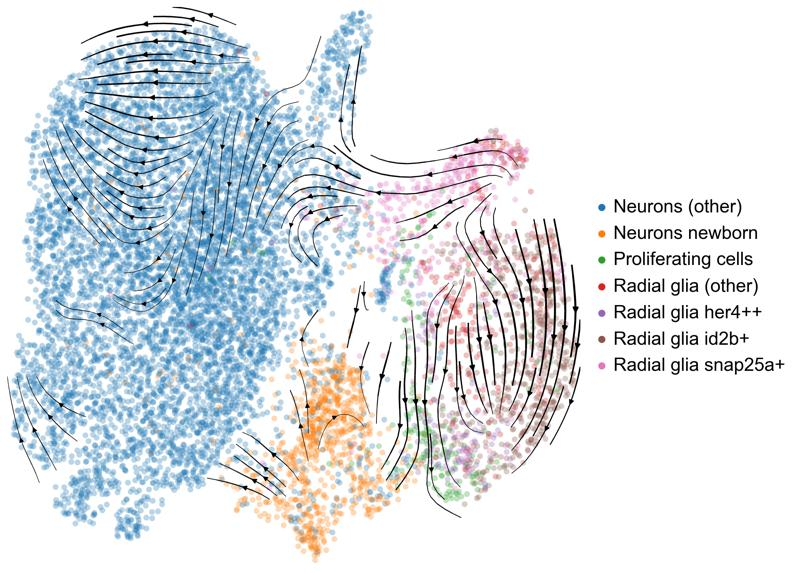

In [17]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=18, 
                                 title='', smooth=.8, min_mass=4, 
                                 color=['celltype_detailed_selective'],
                                 legend_loc='right margin', 
                                 figsize=[10,10])#, save='tel_embstr_dct' #stochastic

In [18]:
# manually picked, most from Set1 pallette https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=8
# lighter hues yellow (Neurons (other)) from Pastel1
# darker grey hue for RG other

col_celltype_detailed_sel = {'Neurons (other)' : '#ffffcc', 
                            'Radial glia (other)' : '#bababa',
                            'Neurons newborn' : '#ffff33',
                            'Proliferating cells' : '#ff7f00',
                            'Radial glia her4++' : '#984ea3',
                            'Radial glia id2b+' : '#377eb8',
                            'Radial glia snap25a+' : '#e41a1c'}

saving figure to file ./figures/scvelo_tel_embstr_dct_sel.pdf


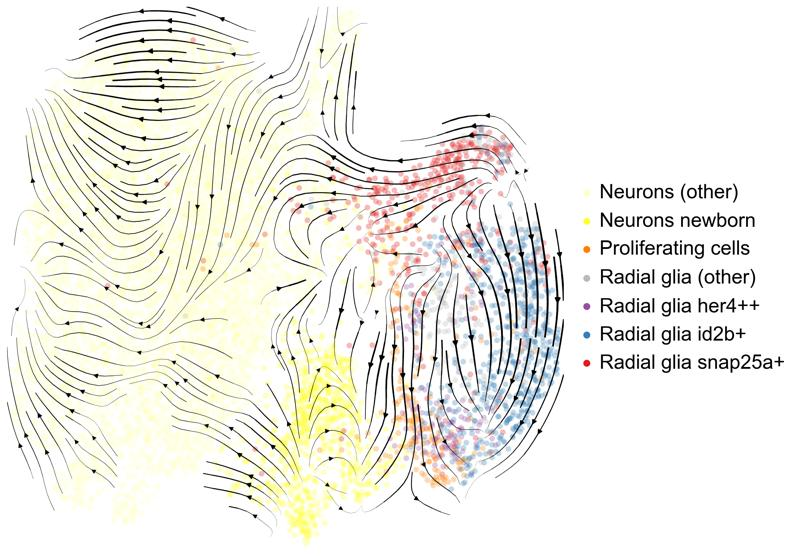

In [19]:
scv.pl.velocity_embedding_stream(tel_rg_neu, basis='umap', legend_fontsize=20, 
                                 title='', smooth=.8, min_mass=3, 
                                 color=['celltype_detailed_selective'],
                                 palette=col_celltype_detailed_sel,
                                 legend_loc='right margin', 
                                 figsize=[10,10],
                                 save='tel_embstr_dct_sel.pdf')#,  #stochastic

### Calculate transition probabilities between cell types
 

In [20]:
# original version by Tara
def cluster_prop_dct(adata_object, cluster_nr):
    leiden_clusters = list(adata_object.obs.celltype_detailed_selective.cat.categories) 
   
    from_cluster = leiden_clusters[cluster_nr]
    from_cluster_index = [i for i in range(len(adata_object.obs.celltype_detailed_selective)) if adata_object.obs.celltype_detailed_selective[i] in from_cluster]
    #print(from_cluster)
    indices_all_clusters = []
    
    for cluster_ in leiden_clusters:
        #print(cluster)
        cluster = [cluster_]
        indices_all_clusters.append([i for i in range(len(adata_object.obs.celltype_detailed_selective)) if adata_object.obs.celltype_detailed_selective[i] in cluster])
    
    transitions_per_cluster = []
    transitions_sum = []
    
    transition_matrix = scv.utils.get_transition_matrix(adata_object)
    transition_matrix = (transition_matrix)[from_cluster_index,:]
    print(transition_matrix.get_shape())
    
    max_transitions = transition_matrix.max(axis=1).toarray() #take max transition for each cell
    max_indices = np.argmax(transition_matrix, axis=1)
    print("Total nr of cells in cluster: " + str(len(max_indices)))
    
    max_transitions_per_clusters = []
   
    for cluster_indices in indices_all_clusters:
       # print(len(indices_all_clusters[15]))
        cluster_indices_max = []
        for index in range(len(max_indices)):
            if max_indices[index] in cluster_indices:
                cluster_indices_max = cluster_indices_max + list((max_transitions[index]))
                
        sum_max = np.sum(cluster_indices_max) 
        max_transitions_per_clusters.append(sum_max)
        
    print(max_transitions_per_clusters)
        
    norm_transitions_sum = [float(i)/sum(max_transitions_per_clusters) for i in max_transitions_per_clusters]
    
    print(norm_transitions_sum)
    
    def my_autopct(pct):
        return ('%1.1f%%' % pct) if pct > 8 else ''

    fig1, ax1 = pl.subplots(figsize=(8,8), dpi=300)
    #ax1.set_title('Transitions from cluster ' + str(cluster_nr))
    ax1.pie(norm_transitions_sum, autopct=my_autopct, startangle=90, textprops={'fontsize': 30}, colors = col_celltype_detailed_sel_num)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    #pl.legend(leiden_clusters,bbox_to_anchor=(1, 1.05), loc=0)
    pl.show()
    #pl.legend(leiden_clusters, loc=2,  prop={'size': 25})

    fig1.savefig("figures/pie_charts/pie_chart_tel_cluster_" + str(cluster_nr) + ".png")

Adjust function so it works with other labeling levels (ie detailed cell types instead of Leiden clusters):

In [131]:
# make pallete with same colors as in UMAP above
# here as list in order of categorical values
# change to darker grey for RG other
col_celltype_detailed_sel_num = ['#ffffcc', '#ffff33','#ff7f00','#bababa','#984ea3','#377eb8','#e41a1c']

In [112]:
# rewrite for increased max transition
# quick fix - write nicer function later
def cluster_prop_dct(adata_object, cluster_nr):
    leiden_clusters = list(adata_object.obs.celltype_detailed_selective.cat.categories) 
   
    from_cluster = leiden_clusters[cluster_nr]
    from_cluster_index = [i for i in range(len(adata_object.obs.celltype_detailed_selective)) if adata_object.obs.celltype_detailed_selective[i] in from_cluster]
    #print(from_cluster)
    indices_all_clusters = []
    
    for cluster_ in leiden_clusters:
        #print(cluster)
        cluster = [cluster_]
        indices_all_clusters.append([i for i in range(len(adata_object.obs.celltype_detailed_selective)) if adata_object.obs.celltype_detailed_selective[i] in cluster])
    
    transitions_per_cluster = []
    transitions_sum = []
    
    transition_matrix = scv.utils.get_transition_matrix(adata_object)
    transition_matrix = (transition_matrix)[from_cluster_index,:]
    print(transition_matrix.get_shape())
    
    max_transitions = transition_matrix.max(axis=1).toarray() #take max transition for each cell
    max_indices = np.argmax(transition_matrix, axis=1)
    print("Total nr of cells in cluster: " + str(len(max_indices)))
    
    max_transitions_per_clusters = []
   
    for cluster_indices in indices_all_clusters:
       # print(len(indices_all_clusters[15]))
        cluster_indices_max = []
        for index in range(len(max_indices)):
            if max_indices[index] in cluster_indices:
                cluster_indices_max = cluster_indices_max + list((max_transitions[index]))
                
        sum_max = np.sum(cluster_indices_max) 
        max_transitions_per_clusters.append(sum_max)
        
    print(max_transitions_per_clusters)
        
    norm_transitions_sum = [float(i)/sum(max_transitions_per_clusters) for i in max_transitions_per_clusters]
    
    print(norm_transitions_sum)
    
    def my_autopct(pct):
        return ('%1.1f%%' % pct) if pct > 99 else ''

    fig1, ax1 = pl.subplots(figsize=(5,5), dpi=300)
    #ax1.set_title('Transitions from cluster ' + str(cluster_nr))
    ax1.pie(norm_transitions_sum, autopct=my_autopct, startangle=90, textprops={'fontsize': 30}, colors = col_celltype_detailed_sel_num)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    #pl.legend(leiden_clusters,bbox_to_anchor=(1, 1.05), loc=0)
    #pl.show()
    #pl.legend(leiden_clusters, loc=2,  prop={'size': 25})

    fig1.savefig("figures/pie_charts/pie_chart_tel_cluster_" + str(cluster_nr) + ".png")

In [12]:
tel_rg_neu.obs.celltype_detailed_selective.cat.categories

Index(['Neurons (other)', 'Neurons newborn', 'Proliferating cells',
       'Radial glia (other)', 'Radial glia gfap++', 'Radial glia id2b+',
       'Radial glia snap25a+'],
      dtype='object')

(7271, 9608)
Total nr of cells in cluster: 7271
[285.091, 3.4247448, 0.025834562, 0.0, 0.0, 0.09706456, 0.90216684]
[0.9846314902992859, 0.011828193733383565, 8.922597778008176e-05, 0.0, 0.0, 0.00033523619942823574, 0.003115853790122243]


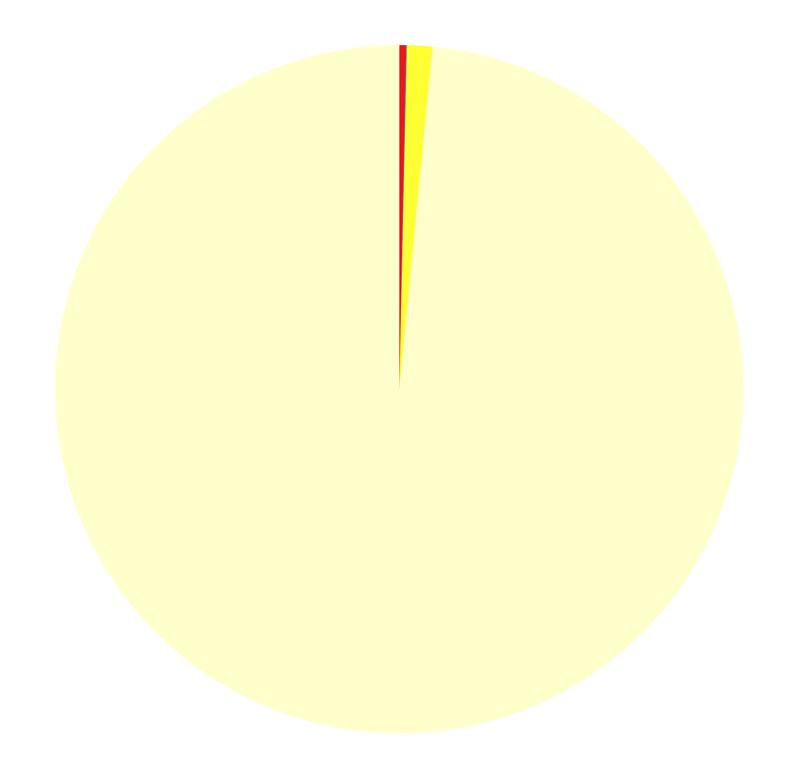

In [132]:
# the number given as argument to the function refers to the index of cell type category
# eg 0 = Neurons (other), 1 = Neurons newborn etc
# refer to adata_object.obs.celltype_detailed_selective.cat.categories for numbered list of categories

cluster_prop_dct(tel_rg_neu, 0)

(848, 9608)
Total nr of cells in cluster: 848
[8.123453, 25.5252, 0.12354538, 0.0, 0.045757774, 0.0, 0.0]
[0.24021123855843743, 0.7547824520184409, 0.003653247930704281, 0.0, 0.0013530614924174335, 0.0, 0.0]


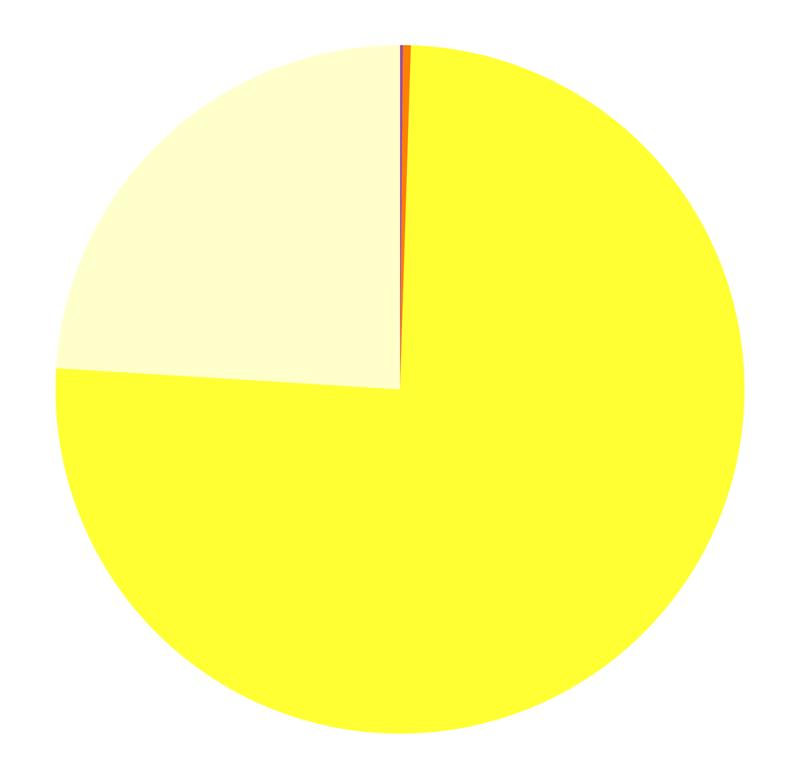

In [133]:
cluster_prop_dct(tel_rg_neu, 1)

(189, 9608)
Total nr of cells in cluster: 189
[0.57292134, 1.0899903, 7.078381, 0.0, 1.3219578, 1.7805338, 0.3018677]
[0.047170900111847304, 0.08974324813836333, 0.5827913628000015, 0.0, 0.10884206383310861, 0.14659845313564493, 0.024853971981034235]


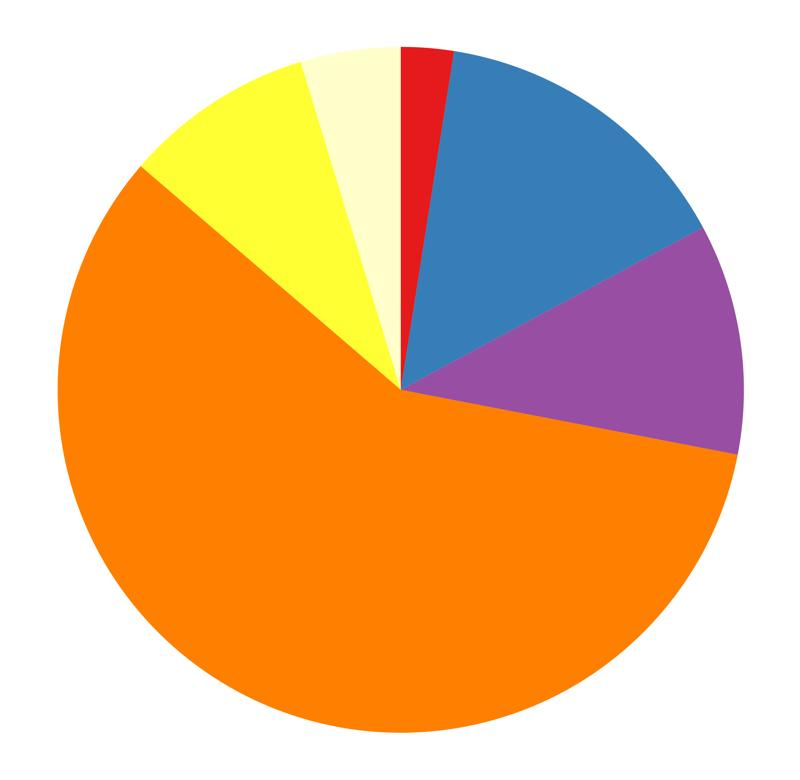

In [134]:
cluster_prop_dct(tel_rg_neu, 2)

(223, 9608)
Total nr of cells in cluster: 223
[0.24249777, 0.15644056, 0.27736986, 8.425775, 0.15455958, 3.4916706, 1.5123624]
[0.017004648565963856, 0.010970066468570717, 0.019449980508197906, 0.5908398017959375, 0.010838167134460164, 0.24484609125105855, 0.10605124427581132]


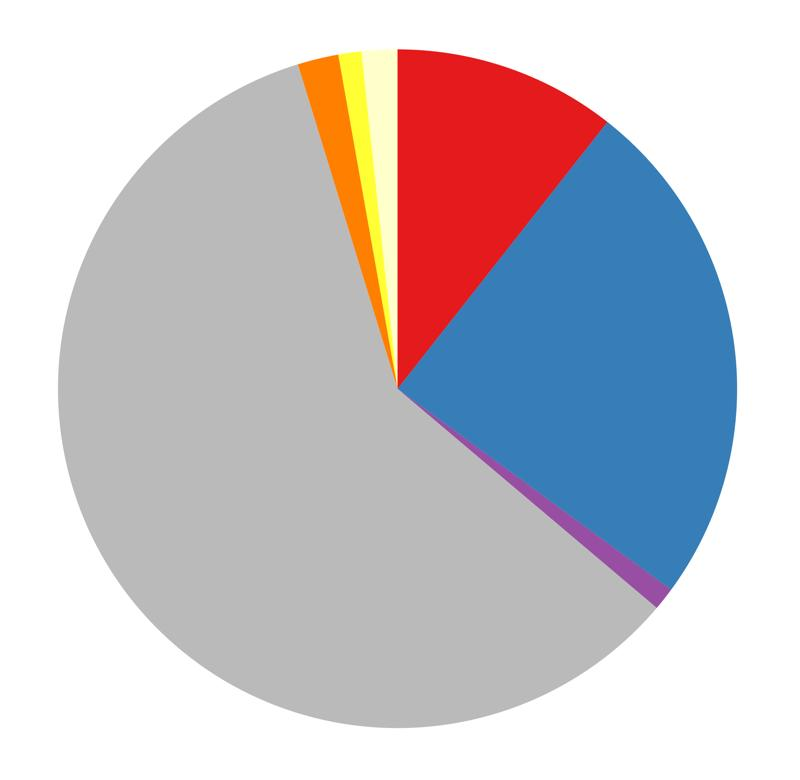

In [135]:
cluster_prop_dct(tel_rg_neu, 3)

(113, 9608)
Total nr of cells in cluster: 113
[0.29935783, 0.89246273, 0.69181347, 0.03148956, 3.4954152, 2.290777, 0.15366328]
[0.03811058307563654, 0.11361745527475438, 0.08807324181377414, 0.0040088660115795835, 0.44499357546245744, 0.29163374652915486, 0.01956253183264309]


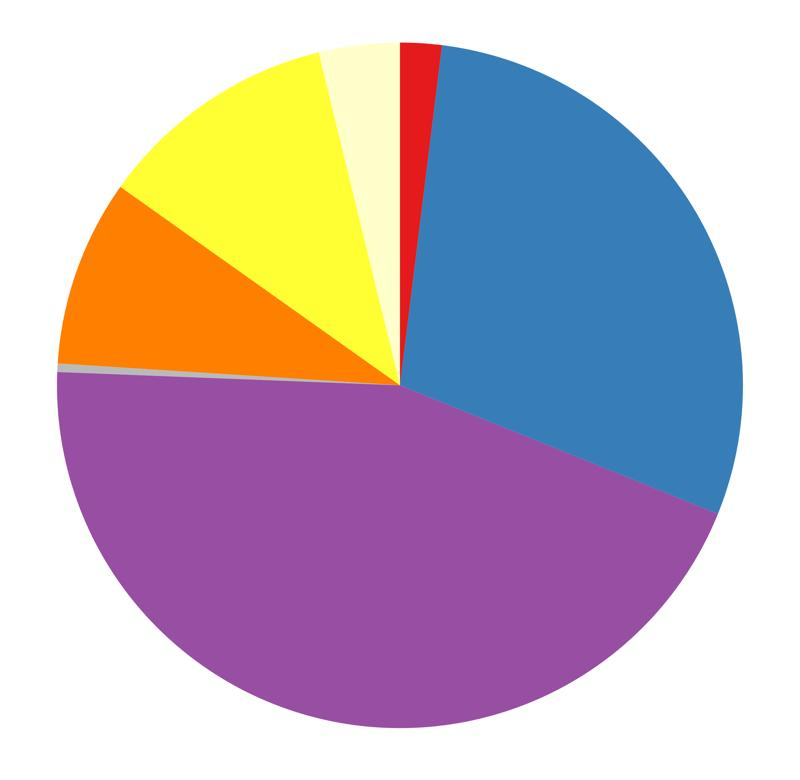

In [136]:
cluster_prop_dct(tel_rg_neu, 4)

(578, 9608)
Total nr of cells in cluster: 578
[0.6053574, 0.3291244, 0.21393454, 3.1962662, 1.2439669, 37.74891, 0.90639216]
[0.013682263908182253, 0.0074388563086144315, 0.004835339923793374, 0.07224188008940696, 0.028116090901555018, 0.8531993296272505, 0.020486239241197374]


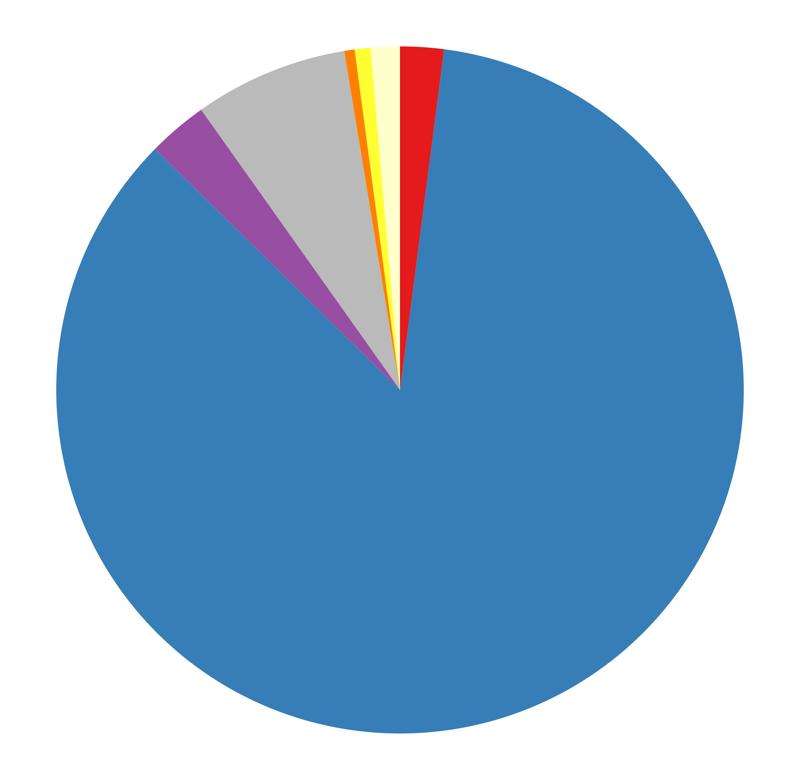

In [137]:
cluster_prop_dct(tel_rg_neu, 5)

(386, 9608)
Total nr of cells in cluster: 386
[1.5427858, 0.31005543, 0.67155385, 1.8835785, 0.2430555, 2.3758354, 24.226562]
[0.04936373101730975, 0.009920685968780292, 0.021487366815760123, 0.060267904027412396, 0.007776922916275916, 0.07601839691974621, 0.7751649923347153]


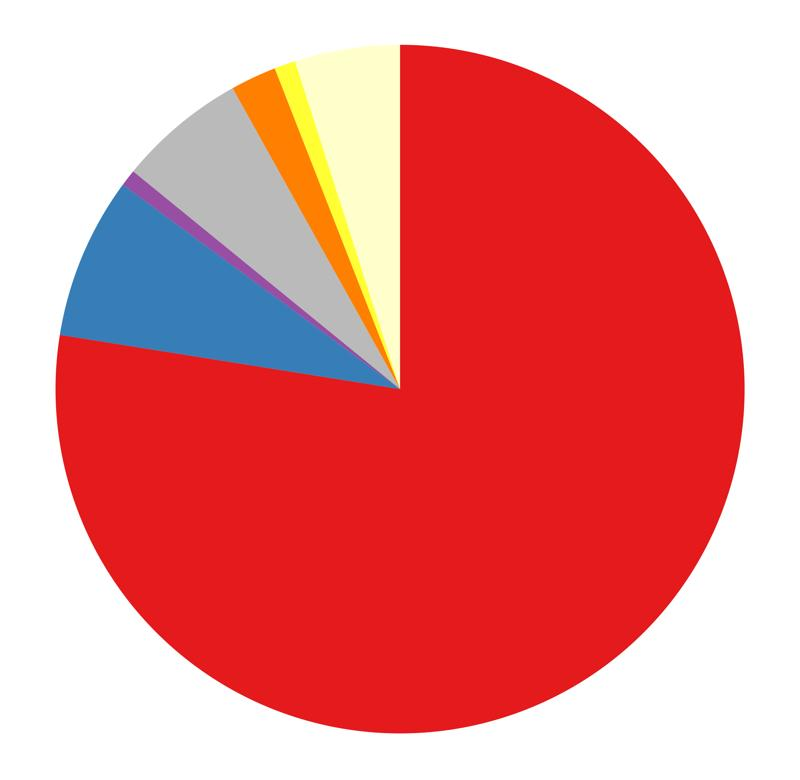

In [138]:
cluster_prop_dct(tel_rg_neu, 6)